# Modelling the effects of alignment, anchoring and rounding in the task performance of estimation in part-to-whole charts


In [499]:
# Import libraries
library(ggplot2)
library(dplyr)
library(ggdist)
library(lme4)
library(ggeffects)
library(patchwork)

In [500]:
# Load data
data <- read.csv("data/fullResults.csv", header=T)

data <- data %>%
  mutate(anchor = ifelse(anchorCategory == "anchor", "anchor", "non-anchor"))

data <- data %>%
  mutate(alignment = ifelse(alignmentCategory == "aligned", "aligned", "unaligned"))

data <- data %>%
  mutate(anchorType = case_when(
    selectedPart == 25 ~ "25",
    selectedPart == 50 ~ "50",
    TRUE ~ "non-anchor"
))

data$alignmentCategory <- factor(data$alignmentCategory, levels = c("aligned", "near-aligned", "far-from-aligned"))
data$anchorCategory <- factor(data$anchorCategory, levels = c("anchor", "near-anchor", "far-anchor"))

data$distToNearest5 <- abs(data$selectedPart - round(data$selectedPart / 5) * 5)
data$distToNearest10 <- abs(data$selectedPart - round(data$selectedPart / 10) * 10)

blue <- "#336199"
lightblue <- "#5688C7"
red <- "#E74236"
lightred <- "#EE766D"
green <- "#00A35F"
lightgreen <- "#0ACC7B"

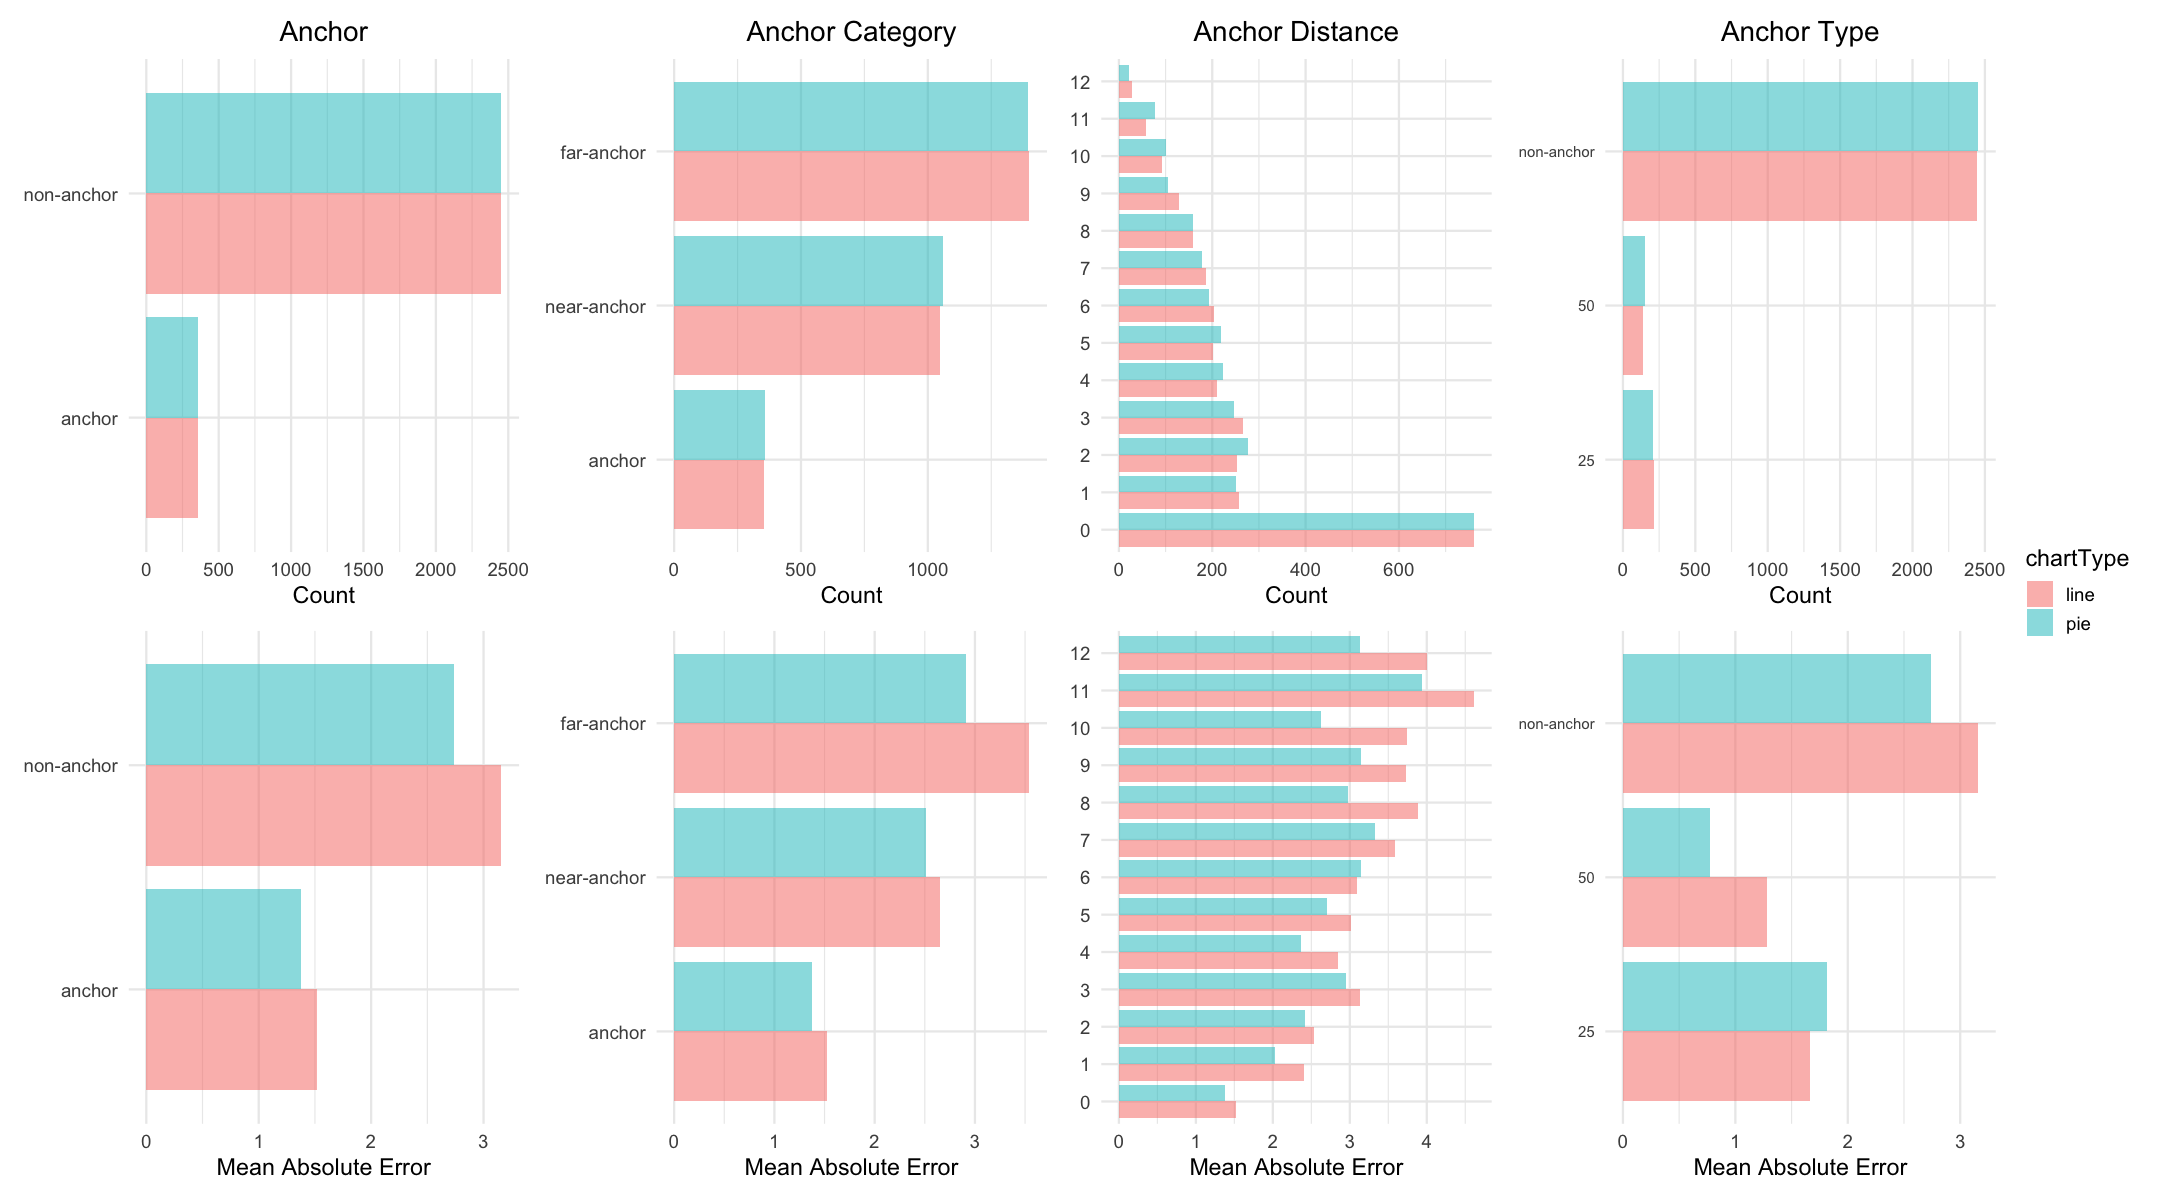

In [501]:
options(repr.plot.width = 18, repr.plot.height = 10)

p1 <- ggplot(data, aes(y = anchor, fill = chartType)) +
  geom_bar(position = "dodge", alpha = 0.5) +
  theme_minimal(base_size = 14) +
  labs(title = "Anchor", y = NULL, x = "Count")

p2 <- ggplot(data, aes(y = anchorCategory, fill = chartType)) +
  geom_bar(position = "dodge", alpha = 0.5) +
  theme_minimal(base_size = 14) +
  labs(title = "Anchor Category", y = NULL, x = "Count")

p3 <- ggplot(data, aes(y = factor(alignmentDistance), fill = chartType)) +
  geom_bar(position = "dodge", alpha = 0.5) +
  theme_minimal(base_size = 14) +
  labs(title = "Anchor Distance", y = NULL, x = "Count")

p4 <- ggplot(data, aes(y = anchorType, fill = chartType)) +
  geom_bar(position = "dodge", alpha = 0.5) +
  theme_minimal(base_size = 14) +
  labs(title = "Anchor Type", y = NULL, x = "Count") +
  theme(axis.text.y = element_text(size = 9))

p5 <- ggplot(data, aes(y = anchor, x = absError, fill = chartType)) +
  stat_summary(fun = mean, geom = "bar", position = "dodge", alpha = 0.5) +
  theme_minimal(base_size = 14) +
  labs(y = NULL, x = "Mean Absolute Error")

p6 <- ggplot(data, aes(y = anchorCategory, x = absError, fill = chartType)) +
  stat_summary(fun = mean, geom = "bar", position = "dodge", alpha = 0.5) +
  theme_minimal(base_size = 14) +
  labs(y = NULL, x = "Mean Absolute Error")

p7 <- ggplot(data, aes(y = factor(anchorDistance), x = absError, fill = chartType)) +
  stat_summary(fun = mean, geom = "bar", position = "dodge", alpha = 0.5) +
  theme_minimal(base_size = 14) +
  labs(y = NULL, x = "Mean Absolute Error")

p8 <- ggplot(data, aes(y = anchorType, x = absError, fill = chartType)) +
  stat_summary(fun = mean, geom = "bar", position = "dodge", alpha = 0.5) +
  theme_minimal(base_size = 14) +
  labs(y = NULL, x = "Mean Absolute Error") +
  theme(axis.text.y = element_text(size = 9))

(p1 | p2 | p3 | p4) /
(p5 | p6 | p7 | p8) +
  plot_layout(guides = "collect") &
  theme(plot.title = element_text(hjust = 0.5))

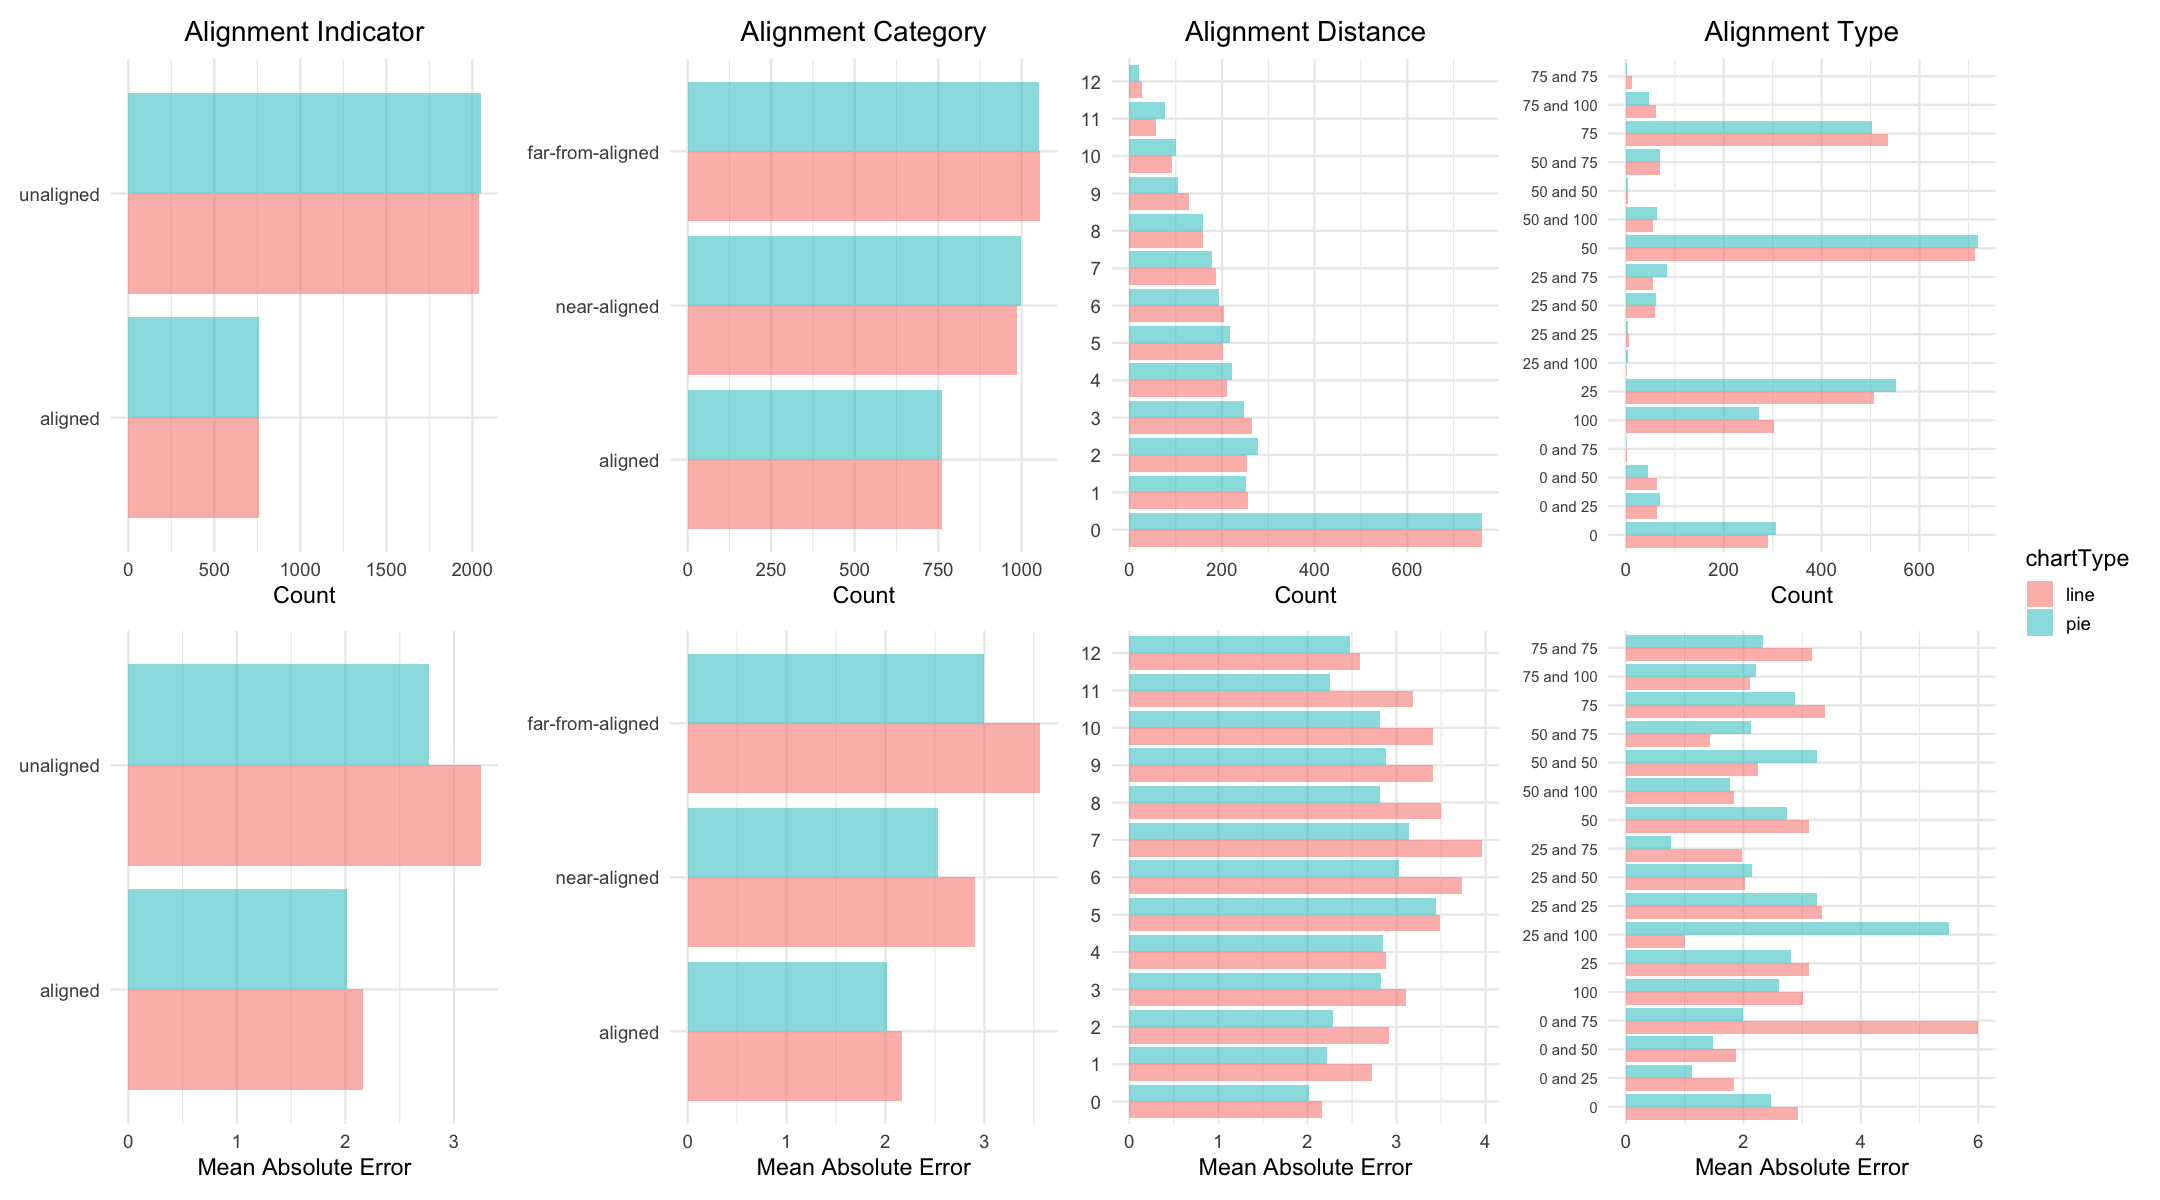

In [502]:
options(repr.plot.width = 18, repr.plot.height = 10)

p1 <- ggplot(data, aes(y = alignment, fill = chartType)) +
  geom_bar(position = "dodge", alpha = 0.5) +
  theme_minimal(base_size = 14) +
  labs(title = "Alignment Indicator", y = NULL, x = "Count")

p2 <- ggplot(data, aes(y = alignmentCategory, fill = chartType)) +
  geom_bar(position = "dodge", alpha = 0.5) +
  theme_minimal(base_size = 14) +
  labs(title = "Alignment Category", y = NULL, x = "Count")

p3 <- ggplot(data, aes(y = factor(alignmentDistance), fill = chartType)) +
  geom_bar(position = "dodge", alpha = 0.5) +
  theme_minimal(base_size = 14) +
  labs(title = "Alignment Distance", y = NULL, x = "Count")

p4 <- ggplot(data, aes(y = alignmentType, fill = chartType)) +
  geom_bar(position = "dodge", alpha = 0.5) +
  theme_minimal(base_size = 14) +
  labs(title = "Alignment Type", y = NULL, x = "Count") +
  theme(axis.text.y = element_text(size = 9))

p5 <- ggplot(data, aes(y = alignment, x = absError, fill = chartType)) +
  stat_summary(fun = mean, geom = "bar", position = "dodge", alpha = 0.5) +
  theme_minimal(base_size = 14) +
  labs(y = NULL, x = "Mean Absolute Error")

p6 <- ggplot(data, aes(y = alignmentCategory, x = absError, fill = chartType)) +
  stat_summary(fun = mean, geom = "bar", position = "dodge", alpha = 0.5) +
  theme_minimal(base_size = 14) +
  labs(y = NULL, x = "Mean Absolute Error")

p7 <- ggplot(data, aes(y = factor(alignmentDistance), x = absError, fill = chartType)) +
  stat_summary(fun = mean, geom = "bar", position = "dodge", alpha = 0.5) +
  theme_minimal(base_size = 14) +
  labs(y = NULL, x = "Mean Absolute Error")

p8 <- ggplot(data, aes(y = alignmentType, x = absError, fill = chartType)) +
  stat_summary(fun = mean, geom = "bar", position = "dodge", alpha = 0.5) +
  theme_minimal(base_size = 14) +
  labs(y = NULL, x = "Mean Absolute Error") +
  theme(axis.text.y = element_text(size = 9))

(p1 | p2 | p3 | p4) /
(p5 | p6 | p7 | p8) +
  plot_layout(guides = "collect") &
  theme(plot.title = element_text(hjust = 0.5))

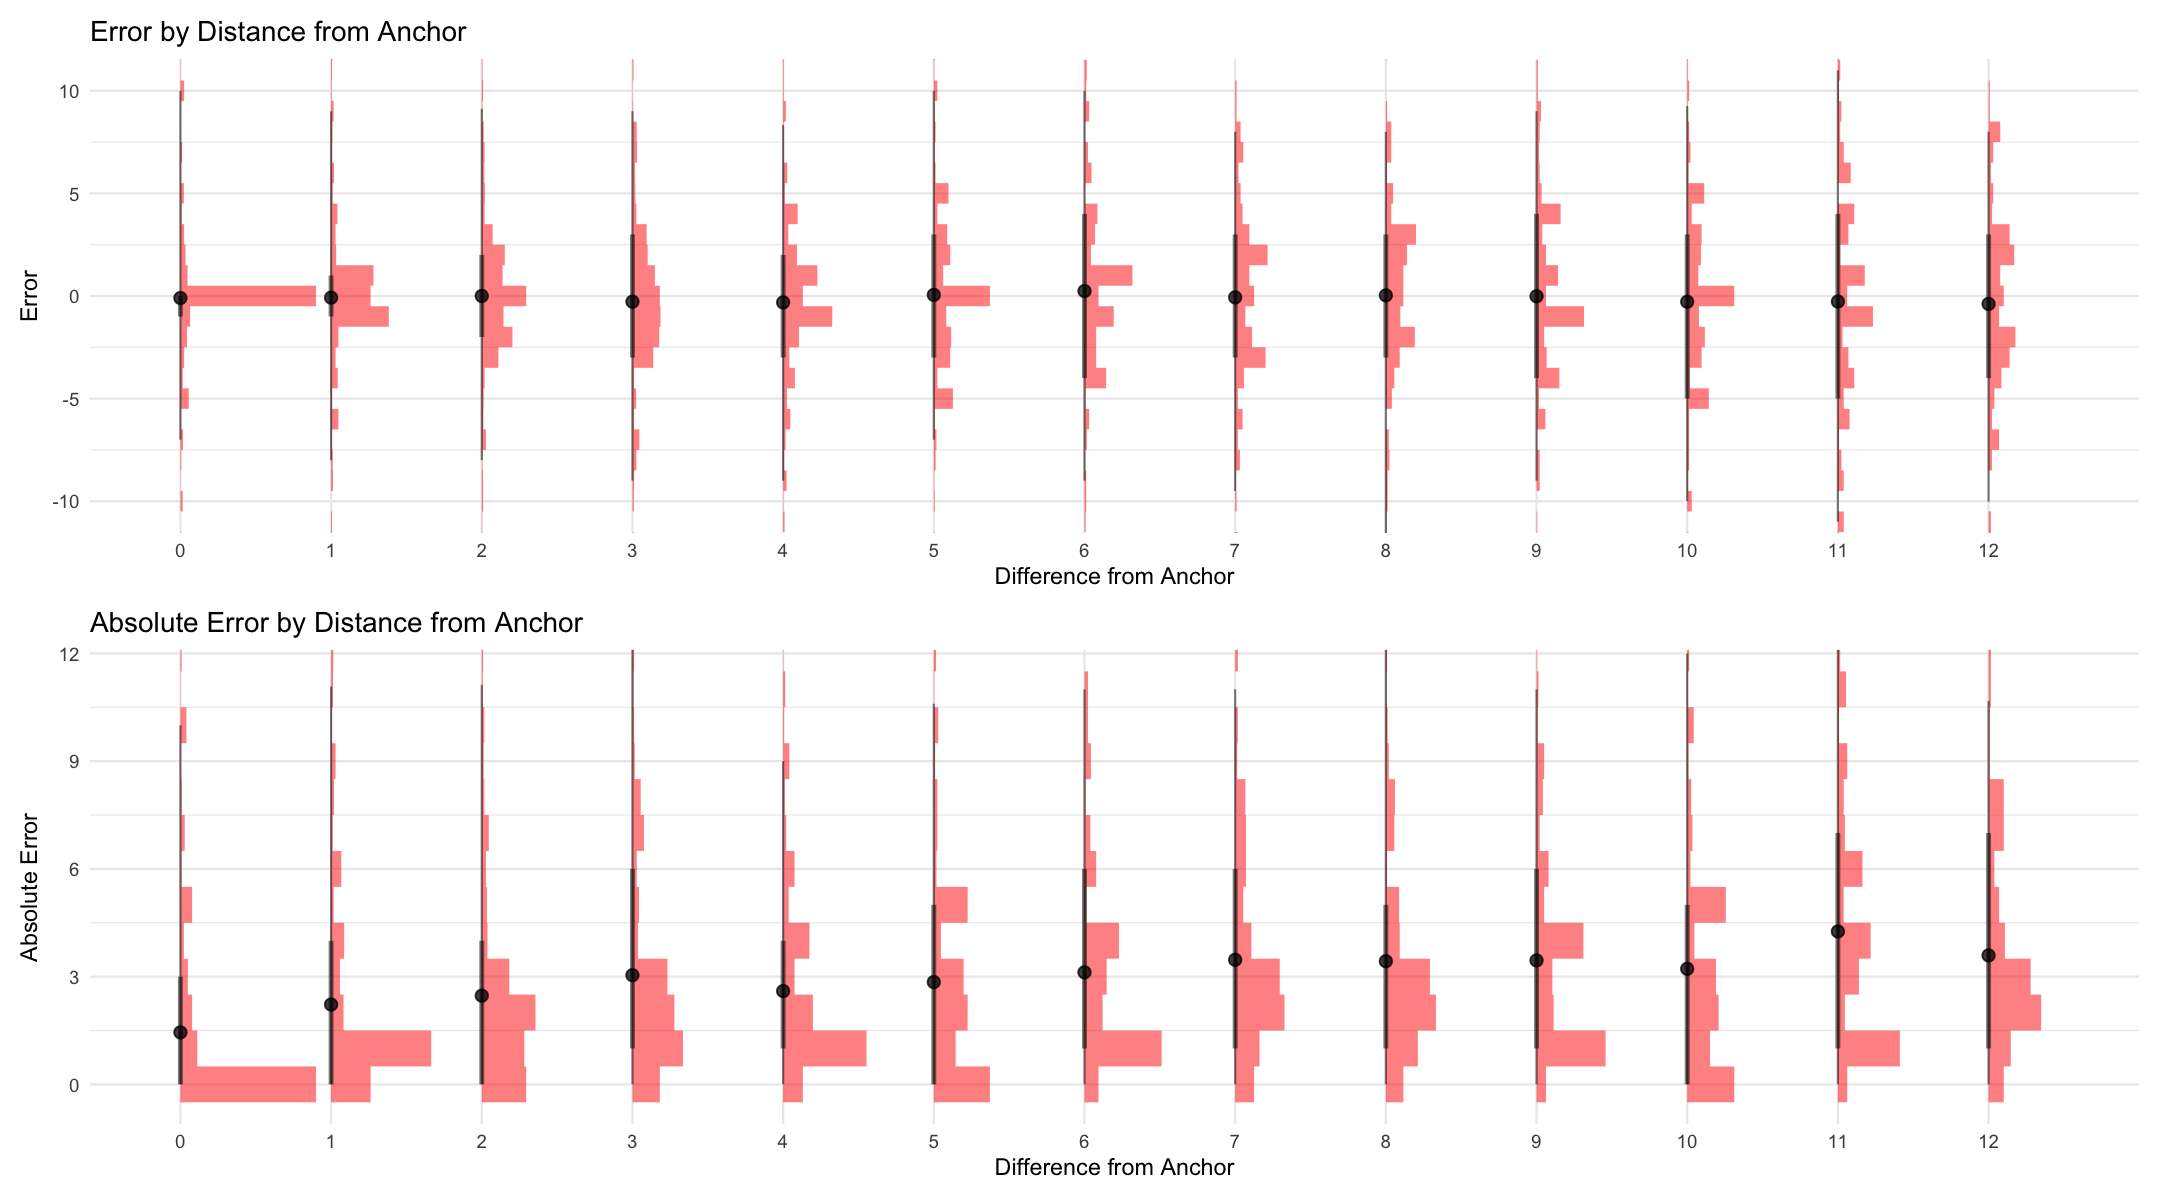

In [503]:
# Error vs. Distance to Anchor
breaks_error <- seq(floor(min(data$error)) - 0.5, ceiling(max(data$error)) + 0.5, by = 1)
lims_error <- c(-10.5, 10.5)

p1 <- ggplot(data, aes(x = factor(anchorDistance), y = error)) +
  stat_histinterval(breaks=breaks_error, 
                    alpha=0.5, 
                    fill="red", 
                    point_size=3, 
                    slab_linewidth=3, 
                    point_interval=mean_qi) +
  theme_minimal(base_size = 14) +
  coord_cartesian(ylim = lims_error) +
  labs(
    x = "Difference from Anchor",
    y = "Error",
    title = "Error by Distance from Anchor"
  )

# Absolute Error vs. Distance to Anchor
breaks_absdiff <- seq(floor(min(data$absError)) - 0.5, ceiling(max(data$absError)) + 0.5, by = 1)
lims_absdiff <- c(-0.5, 11.5)

p2 <- ggplot(data, aes(x = factor(anchorDistance), y = absError)) +
  stat_histinterval(breaks=breaks_error, 
                    alpha=0.5, 
                    fill="red", 
                    point_size=3, 
                    slab_linewidth=3, 
                    point_interval=mean_qi) +  theme_minimal(base_size = 14) +
  coord_cartesian(ylim = lims_absdiff) +
  labs(
    x = "Difference from Anchor",
    y = "Absolute Error",
    title = "Absolute Error by Distance from Anchor"
  )

p1 / p2

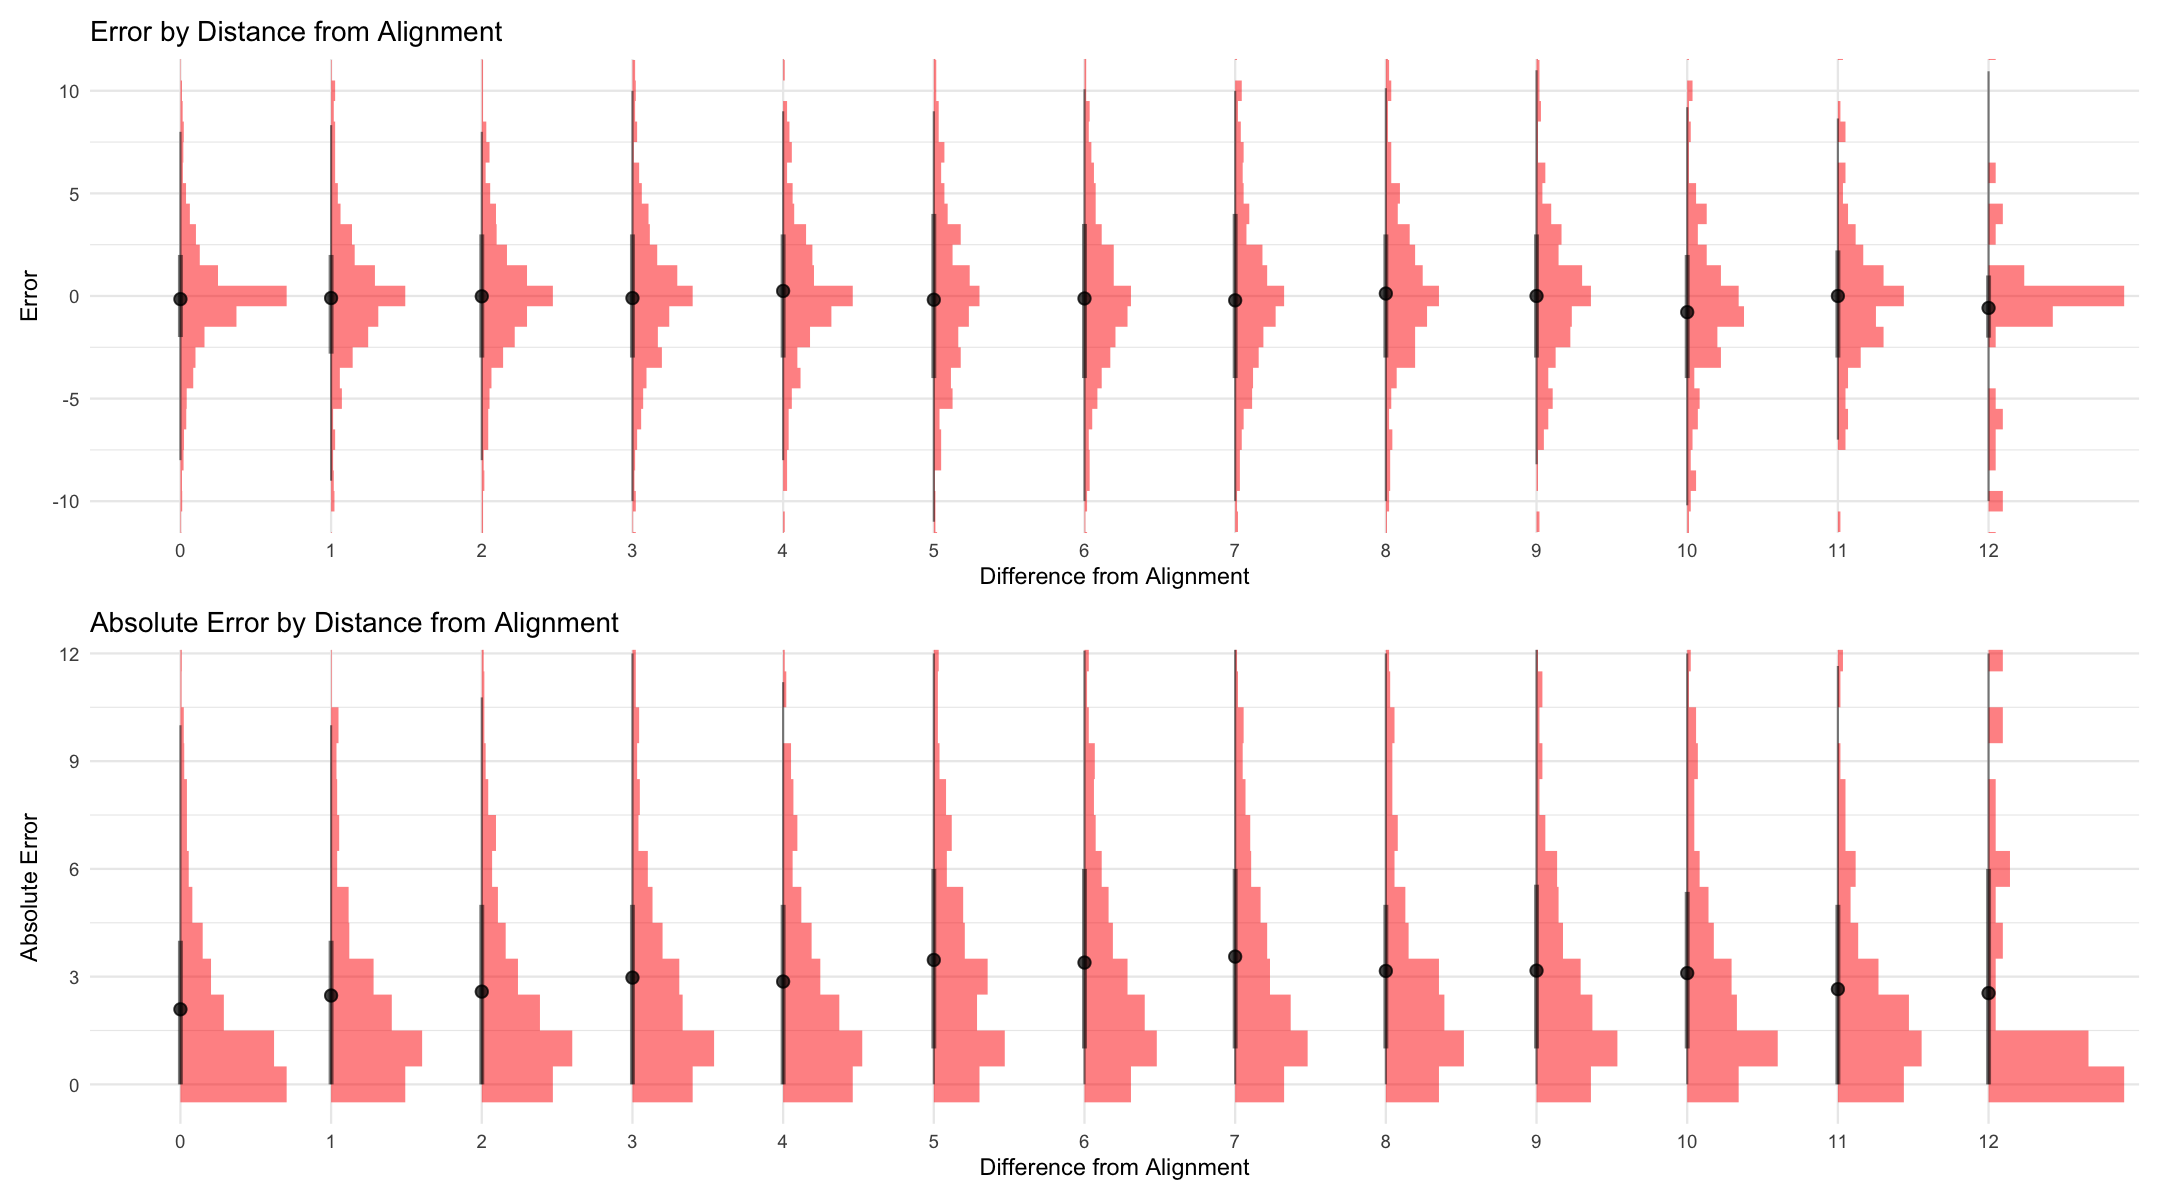

In [504]:
# Error vs. Alignment
breaks_error <- seq(floor(min(data$error)) - 0.5, ceiling(max(data$error)) + 0.5, by = 1)
lims_error <- c(-10.5, 10.5)

p3 <- ggplot(data, aes(x = factor(alignmentDistance), y = error)) +
  stat_histinterval(breaks=breaks_error, 
                    alpha=0.5, 
                    fill="red", 
                    point_size=3, 
                    slab_linewidth=3, 
                    point_interval=mean_qi) +  theme_minimal(base_size = 14) +
  coord_cartesian(ylim = lims_error) +
  labs(
    x = "Difference from Alignment",
    y = "Error",
    title = "Error by Distance from Alignment"
  )

# Absolute Error vs. Alignment
breaks_absdiff <- seq(floor(min(data$absError)) - 0.5, ceiling(max(data$absError)) + 0.5, by = 1)
lims_absdiff <- c(-0.5, 11.5)

p4 <- ggplot(data, aes(x = factor(alignmentDistance), y = absError)) +
  stat_histinterval(breaks=breaks_error, 
                    alpha=0.5, 
                    fill="red", 
                    point_size=3, 
                    slab_linewidth=3, 
                    point_interval=mean_qi) +  theme_minimal(base_size = 14) +
  coord_cartesian(ylim = lims_absdiff) +
  labs(
    x = "Difference from Alignment",
    y = "Absolute Error",
    title = "Absolute Error by Distance from Alignment"
  )

p3 / p4

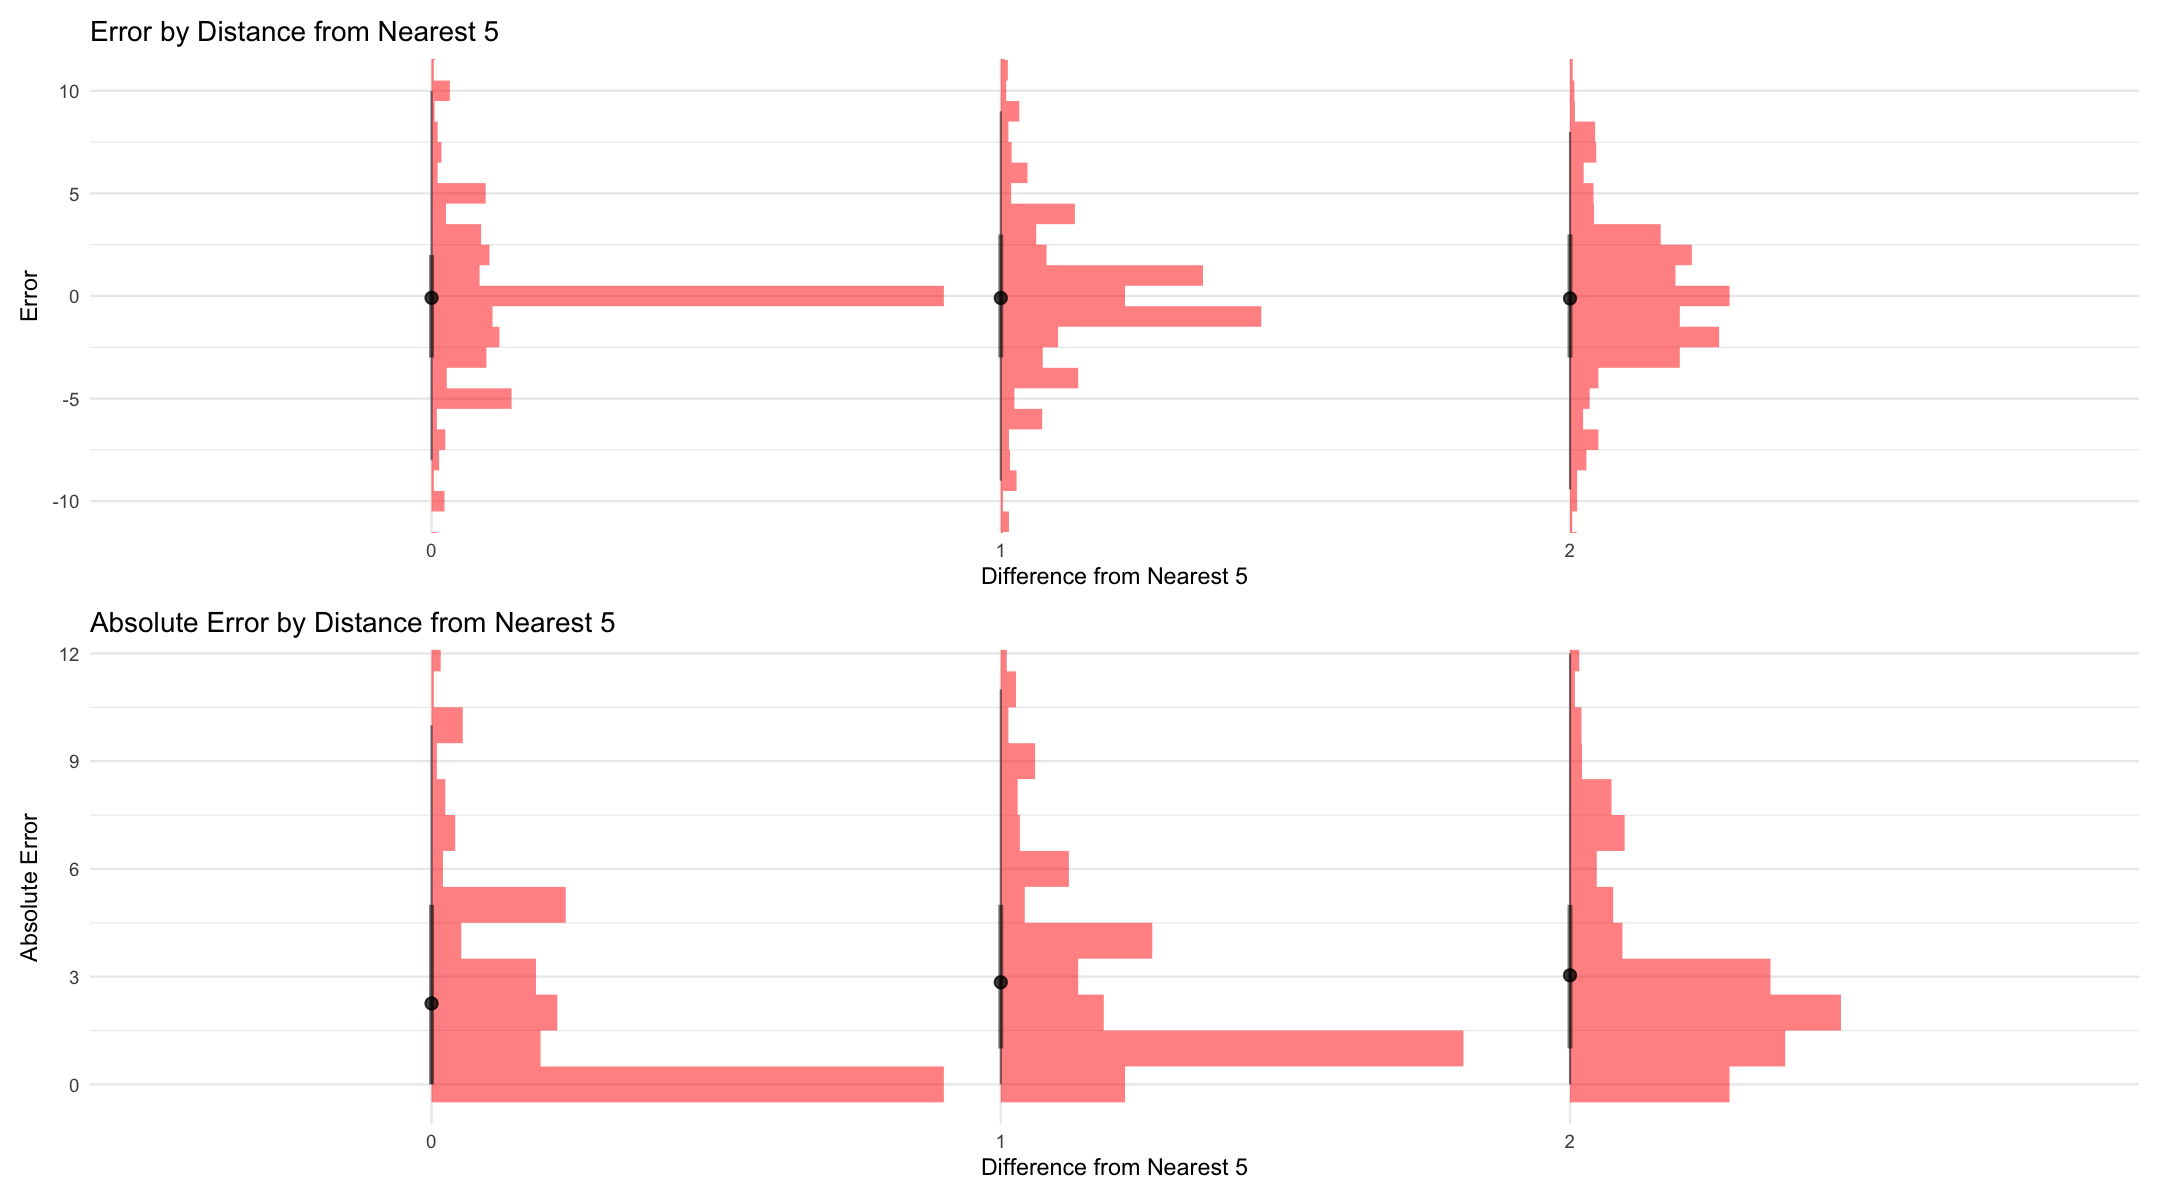

In [505]:
# Error vs. Rounding to 5s
breaks_error <- seq(floor(min(data$error)) - 0.5, ceiling(max(data$error)) + 0.5, by = 1)
lims_error <- c(-10.5, 10.5)

p5 <- ggplot(data, aes(x = factor(distToNearest5), y = error)) +
  stat_histinterval(breaks=breaks_error, 
                    alpha=0.5, 
                    fill="red", 
                    point_size=3, 
                    slab_linewidth=3, 
                    point_interval=mean_qi) +  theme_minimal(base_size = 14) +
  coord_cartesian(ylim = lims_error) +
  labs(
    x = "Difference from Nearest 5",
    y = "Error",
    title = "Error by Distance from Nearest 5"
  )

# Absolute Error vs. Rounding to 5s
breaks_absdiff <- seq(floor(min(data$absError)) - 0.5, ceiling(max(data$absError)) + 0.5, by = 1)
lims_absdiff <- c(-0.5, 11.5)

p6 <- ggplot(data, aes(x = factor(distToNearest5), y = absError)) +
  stat_histinterval(breaks=breaks_error, 
                    alpha=0.5, 
                    fill="red", 
                    point_size=3, 
                    slab_linewidth=3, 
                    point_interval=mean_qi) +  theme_minimal(base_size = 14) +
  coord_cartesian(ylim = lims_absdiff) +
  labs(
    x = "Difference from Nearest 5",
    y = "Absolute Error",
    title = "Absolute Error by Distance from Nearest 5"
  )

p5 / p6

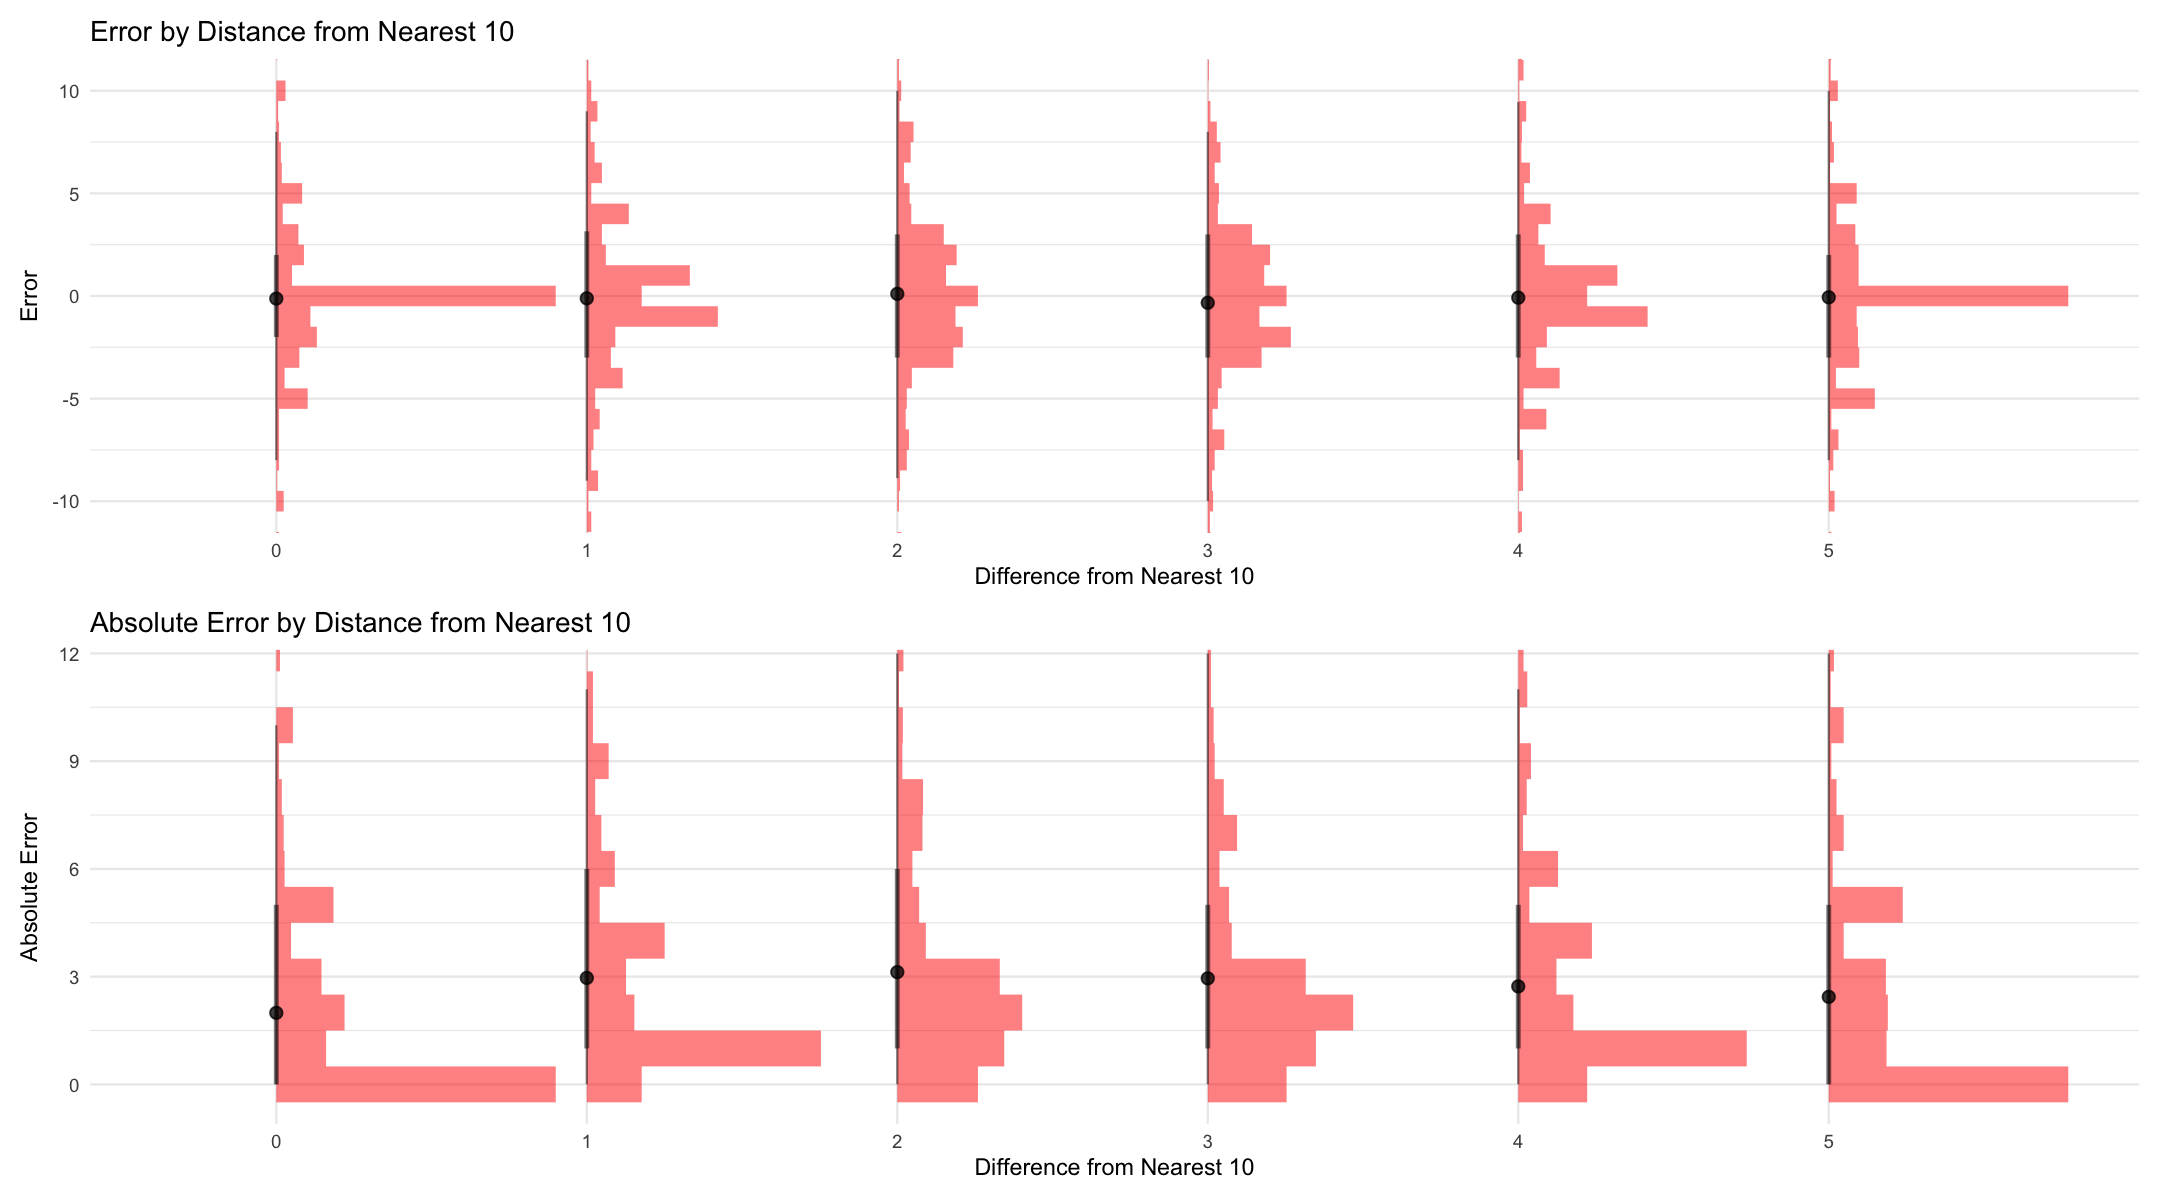

In [506]:
# Error vs. Rounding to 10s
breaks_error <- seq(floor(min(data$error)) - 0.5, ceiling(max(data$error)) + 0.5, by = 1)
lims_error <- c(-10.5, 10.5)

p7 <- ggplot(data, aes(x = factor(distToNearest10), y = error)) +
  stat_histinterval(breaks=breaks_error, 
                    alpha=0.5, 
                    fill="red", 
                    point_size=3, 
                    slab_linewidth=3, 
                    point_interval=mean_qi) +  theme_minimal(base_size = 14) +
  coord_cartesian(ylim = lims_error) +
  labs(
    x = "Difference from Nearest 10",
    y = "Error",
    title = "Error by Distance from Nearest 10"
  )

# Absolute Error vs. Rounding to 10s
breaks_absdiff <- seq(floor(min(data$absError)) - 0.5, ceiling(max(data$absError)) + 0.5, by = 1)
lims_absdiff <- c(-0.5, 11.5)

p8 <- ggplot(data, aes(x = factor(distToNearest10), y = absError)) +
  stat_histinterval(breaks=breaks_error, 
                    alpha=0.5, 
                    fill="red", 
                    point_size=3, 
                    slab_linewidth=3, 
                    point_interval=mean_qi) +  theme_minimal(base_size = 14) +
  coord_cartesian(ylim = lims_absdiff) +
  labs(
    x = "Difference from Nearest 10",
    y = "Absolute Error",
    title = "Absolute Error by Distance from Nearest 10"
  )

p7 / p8

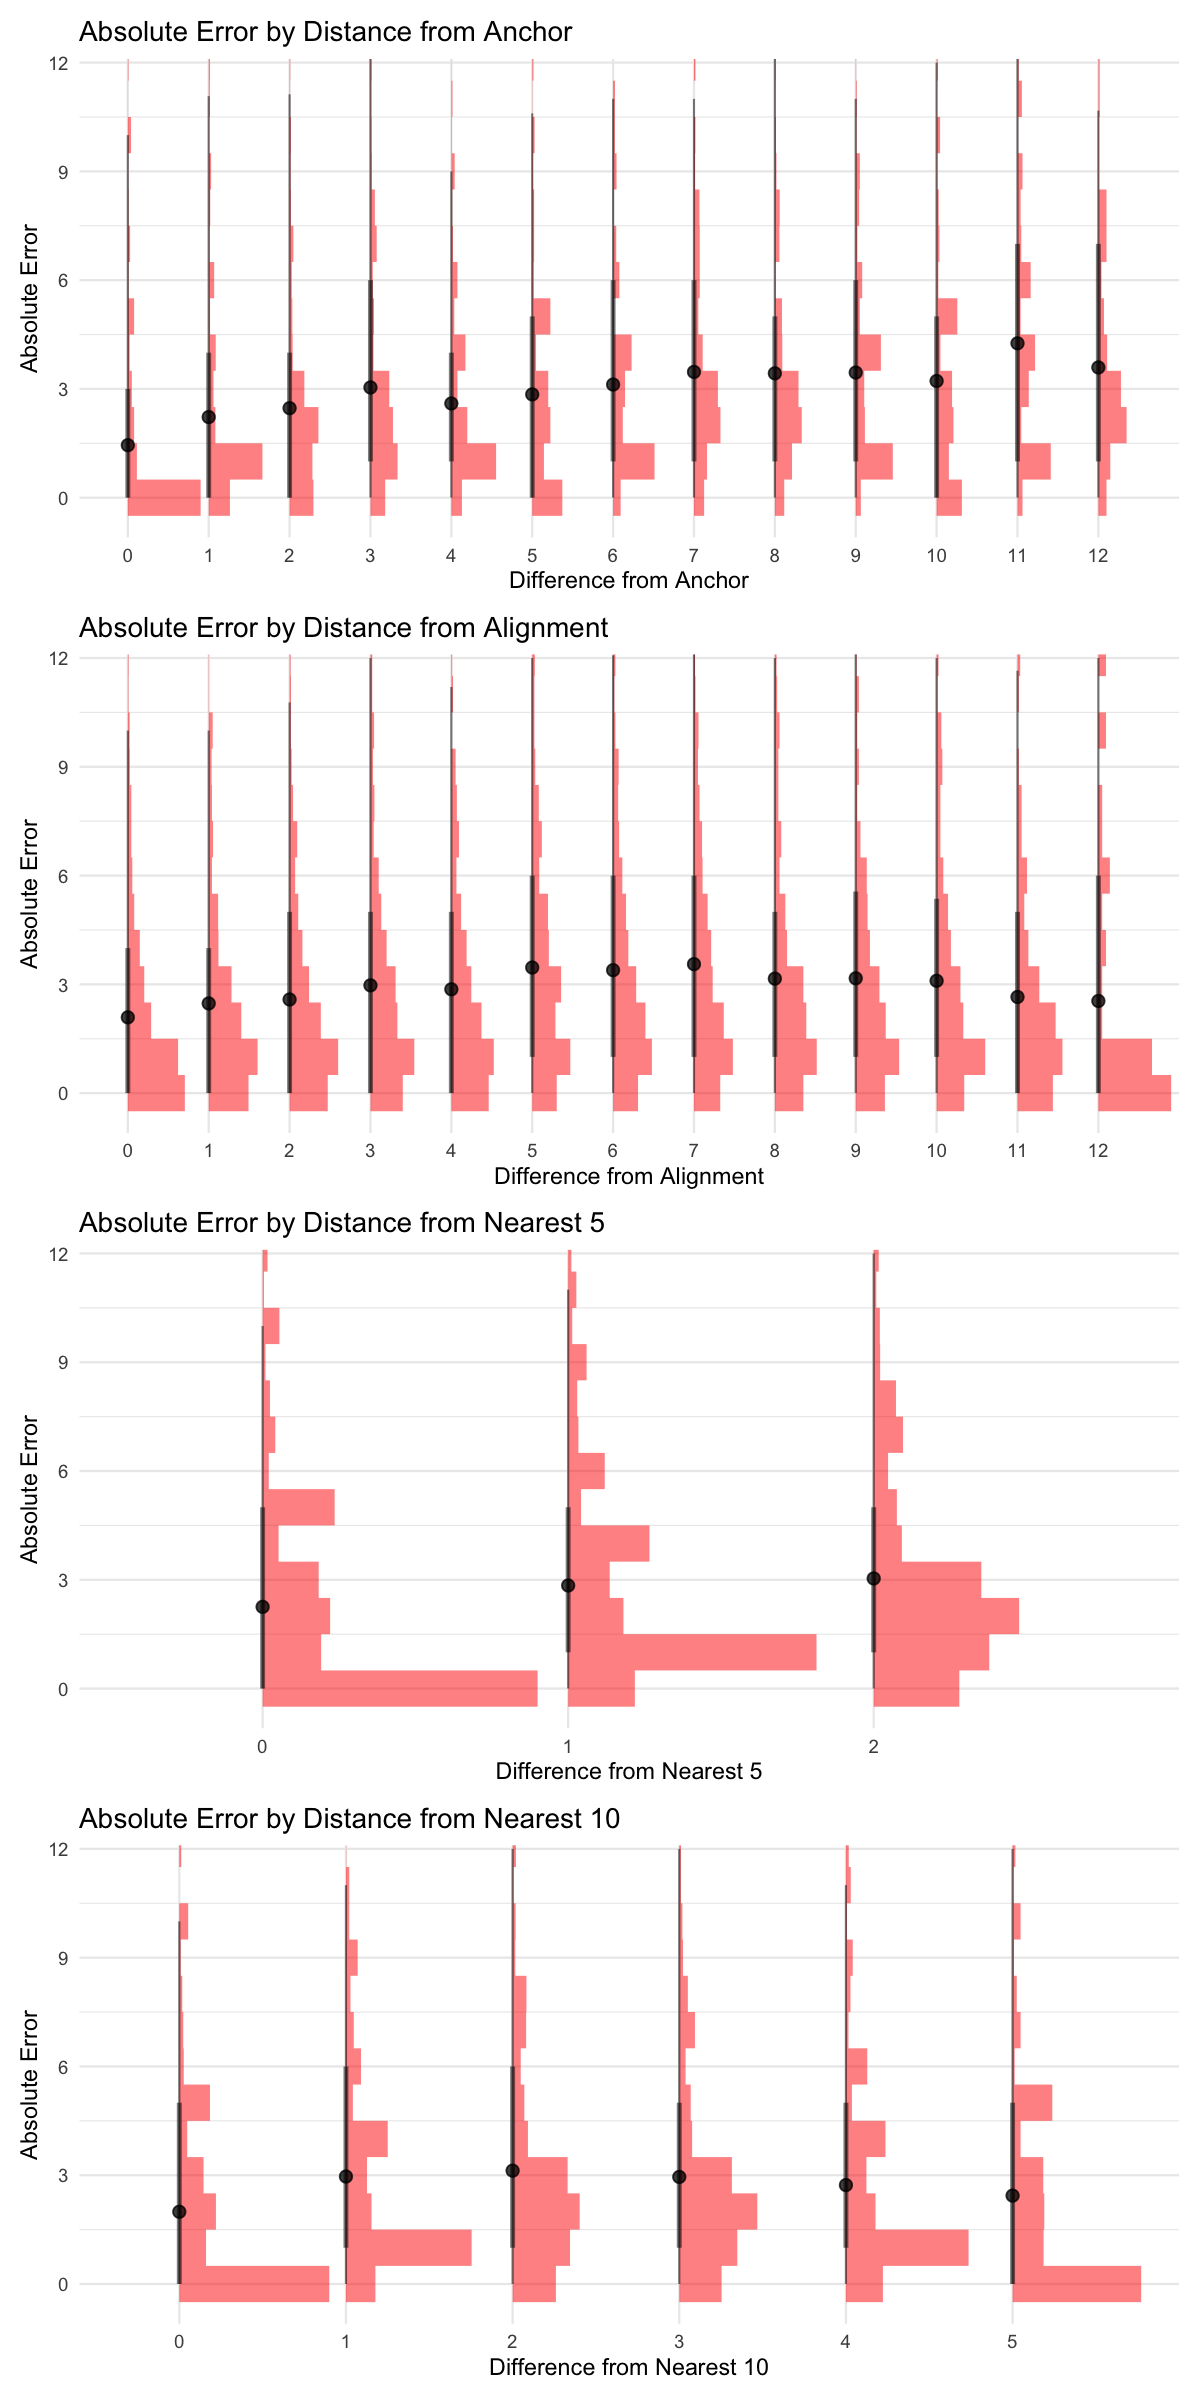

In [507]:
options(repr.plot.width = 10, repr.plot.height = 20)
p2 / p4 / p6 / p8

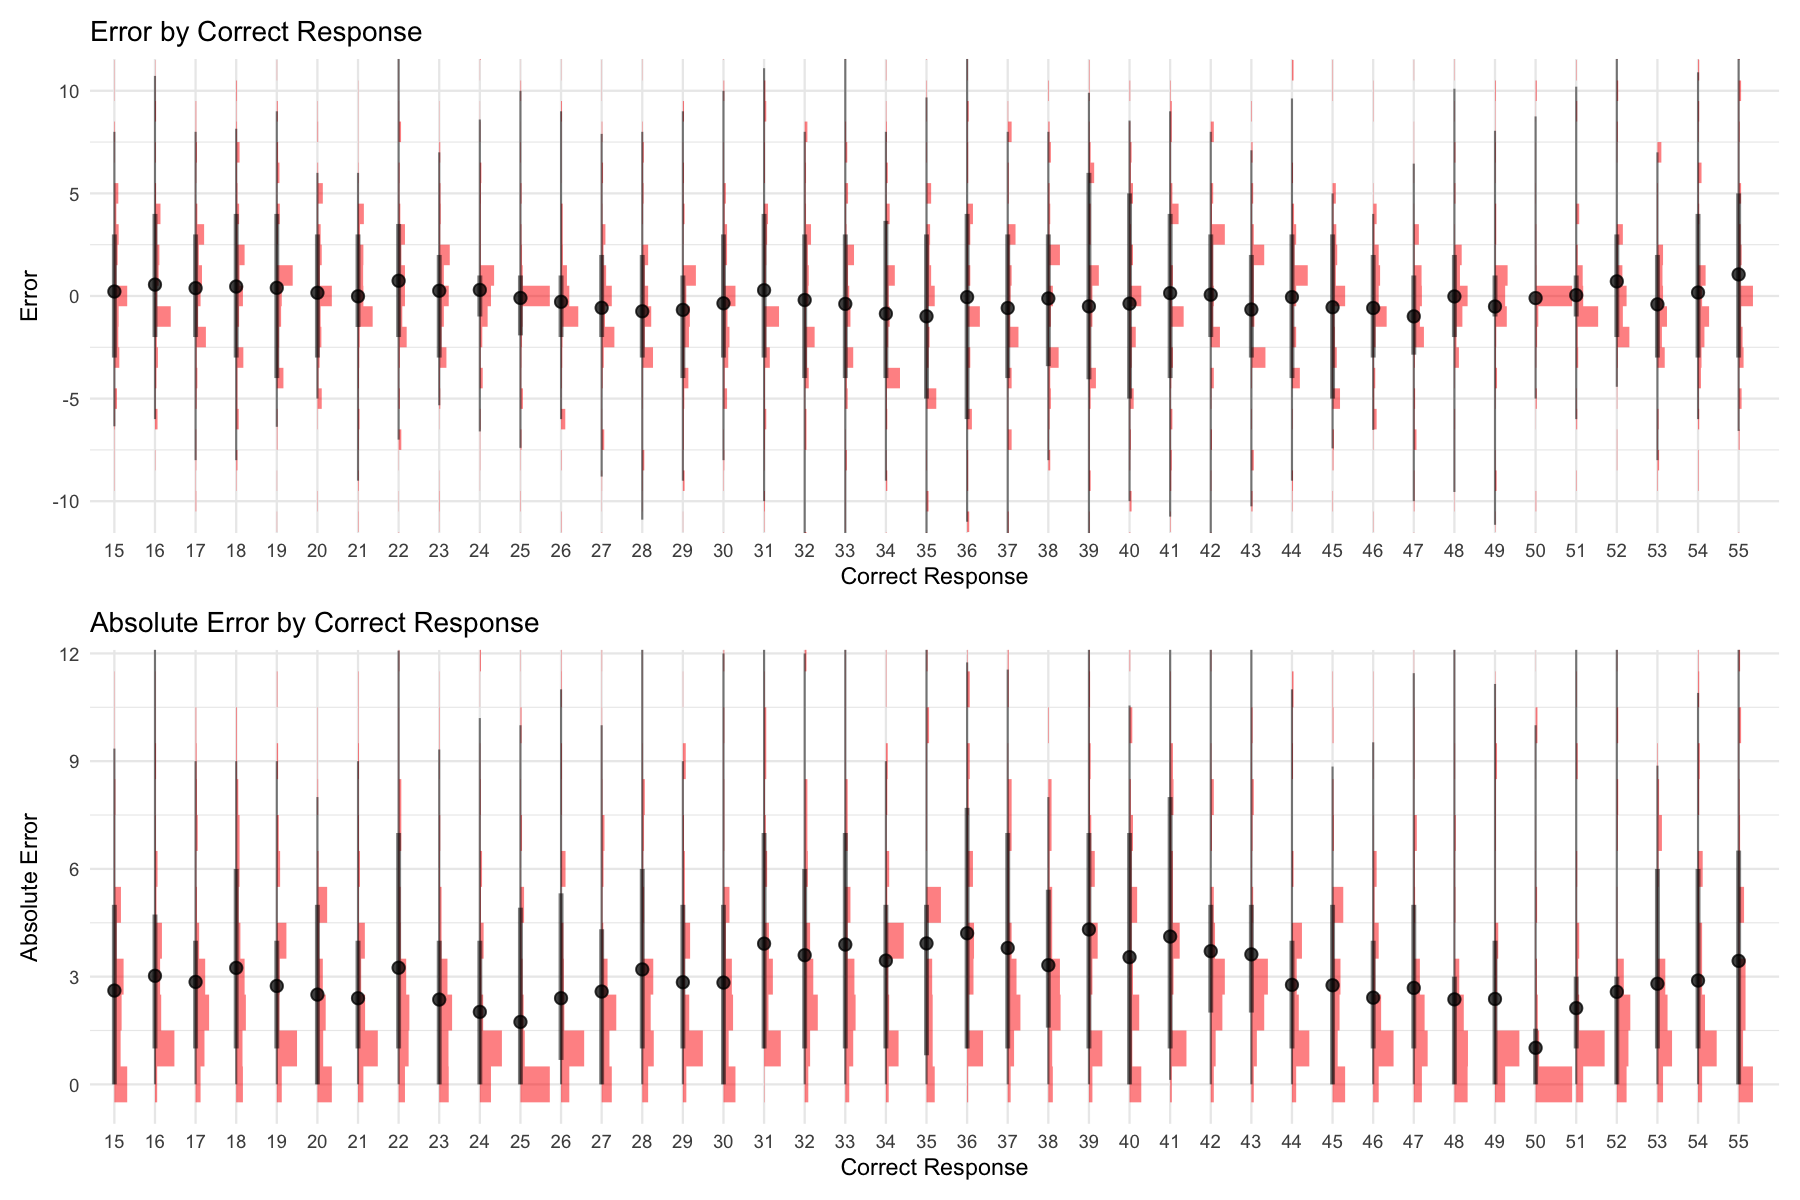

In [508]:
options(repr.plot.width = 15, repr.plot.height = 10)

# Error vs. Correct Response
breaks_error <- seq(floor(min(data$error)) - 0.5, ceiling(max(data$error)) + 0.5, by = 1)
lims_error <- c(-10.5, 10.5)

p1 <- ggplot(data, aes(x = factor(selectedPart), y = error)) +
  stat_histinterval(breaks=breaks_error, 
                    alpha=0.5, 
                    fill="red", 
                    point_size=3, 
                    slab_linewidth=3, 
                    point_interval=mean_qi) +
  theme_minimal(base_size = 14) +
  coord_cartesian(ylim = lims_error) +
  labs(
    x = "Correct Response",
    y = "Error",
    title = "Error by Correct Response"
  )

# Absolute Error vs. Correct Response
breaks_absdiff <- seq(floor(min(data$absError)) - 0.5, ceiling(max(data$absError)) + 0.5, by = 1)
lims_absdiff <- c(-0.5, 11.5)

p2 <- ggplot(data, aes(x = factor(selectedPart), y = absError)) +
  stat_histinterval(breaks=breaks_error, 
                    alpha=0.5, 
                    fill="red", 
                    point_size=3, 
                    slab_linewidth=3, 
                    point_interval=mean_qi) +  theme_minimal(base_size = 14) +
  coord_cartesian(ylim = lims_absdiff) +
  labs(
    x = "Correct Response",
    y = "Absolute Error",
    title = "Absolute Error by Correct Response"
  )

p1 / p2

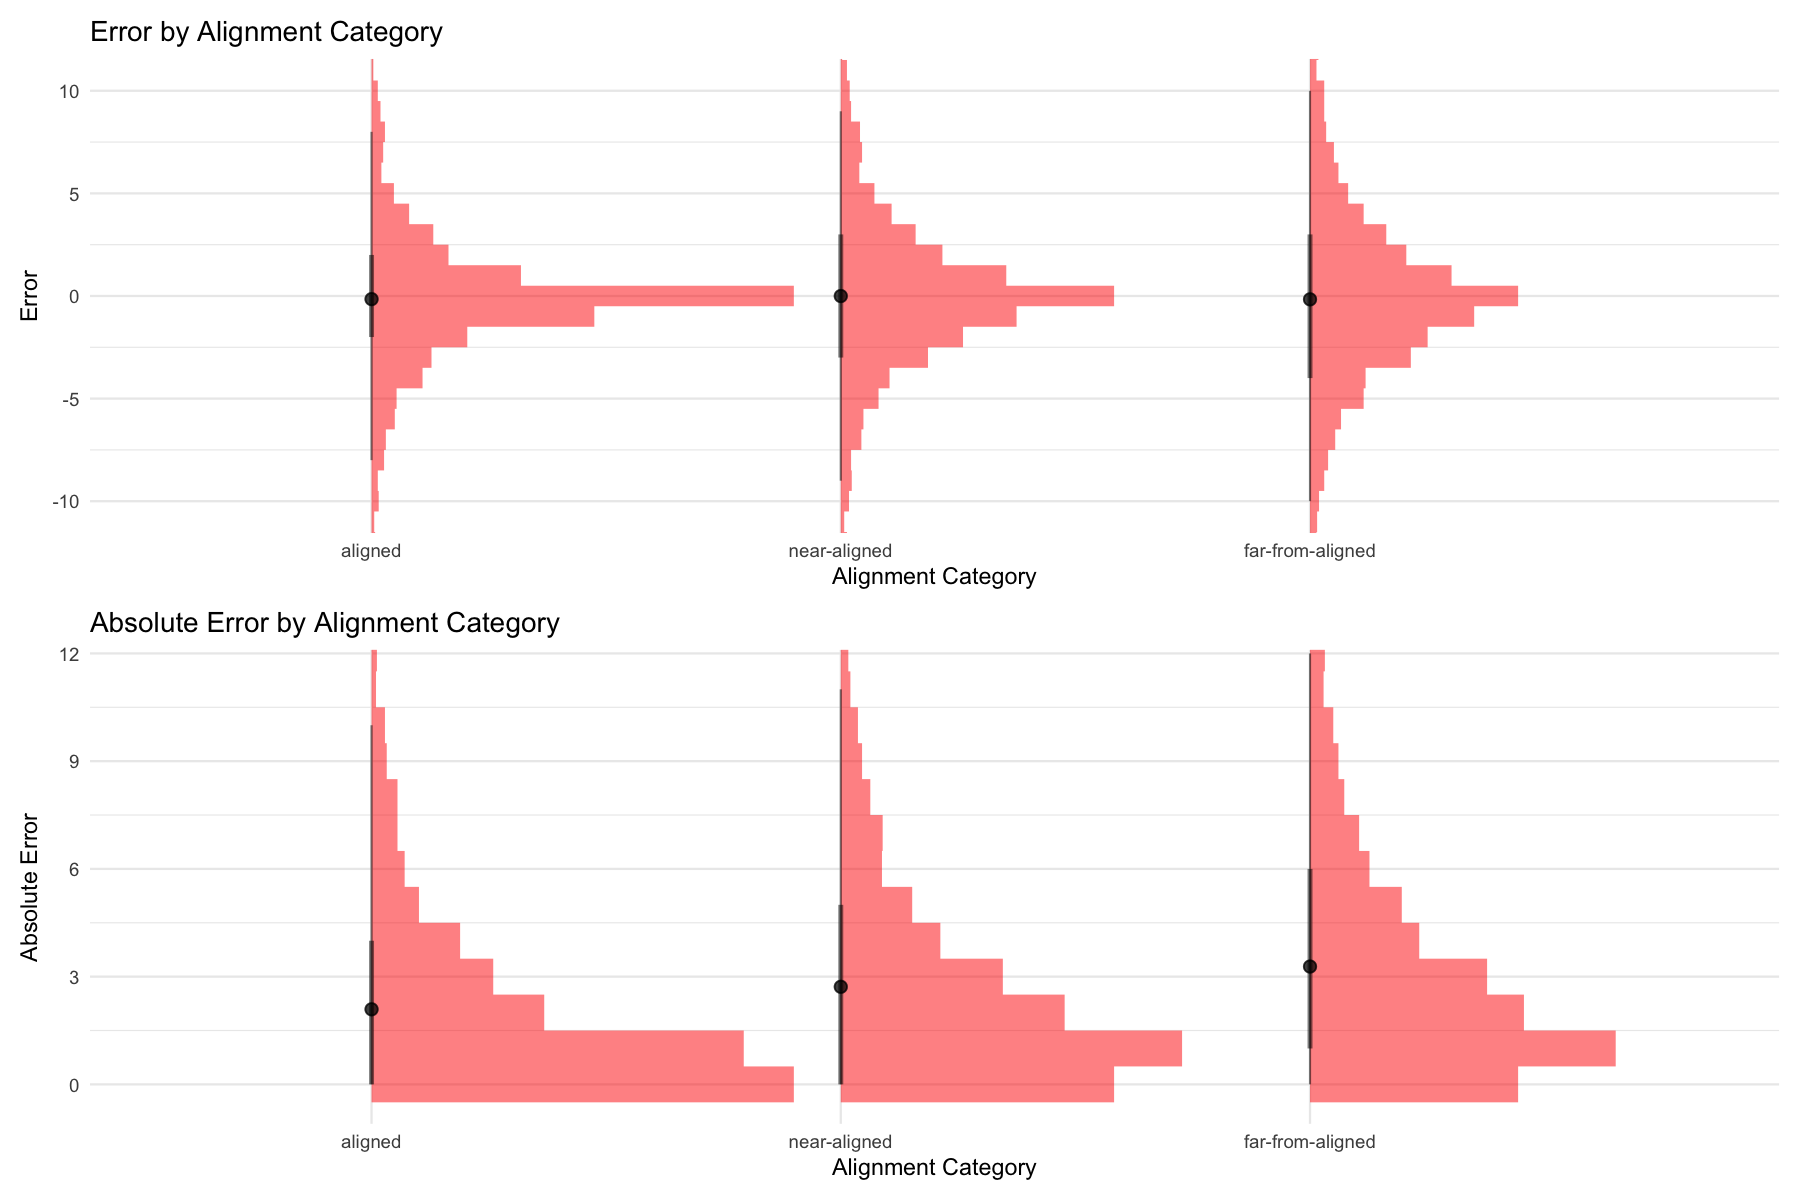

In [509]:
# Error vs. Alignment
breaks_error <- seq(floor(min(data$error)) - 0.5, ceiling(max(data$error)) + 0.5, by = 1)
lims_error <- c(-10.5, 10.5)

p1 <- ggplot(data, aes(x = factor(alignmentCategory), y = error)) +
  stat_histinterval(breaks=breaks_error, 
                    alpha=0.5, 
                    fill="red", 
                    point_size=3, 
                    slab_linewidth=3, 
                    point_interval=mean_qi) +
  theme_minimal(base_size = 14) +
  coord_cartesian(ylim = lims_error) +
  labs(
    x = "Alignment Category",
    y = "Error",
    title = "Error by Alignment Category"
  )

# Absolute Error vs. Distance to Anchor
breaks_absdiff <- seq(floor(min(data$absError)) - 0.5, ceiling(max(data$absError)) + 0.5, by = 1)
lims_absdiff <- c(-0.5, 11.5)

p2 <- ggplot(data, aes(x = factor(alignmentCategory), y = absError)) +
  stat_histinterval(breaks=breaks_error, 
                    alpha=0.5, 
                    fill="red", 
                    point_size=3, 
                    slab_linewidth=3, 
                    point_interval=mean_qi) +  theme_minimal(base_size = 14) +
  coord_cartesian(ylim = lims_absdiff) +
  labs(
    x = "Alignment Category",
    y = "Absolute Error",
    title = "Absolute Error by Alignment Category"
  )

p1 / p2

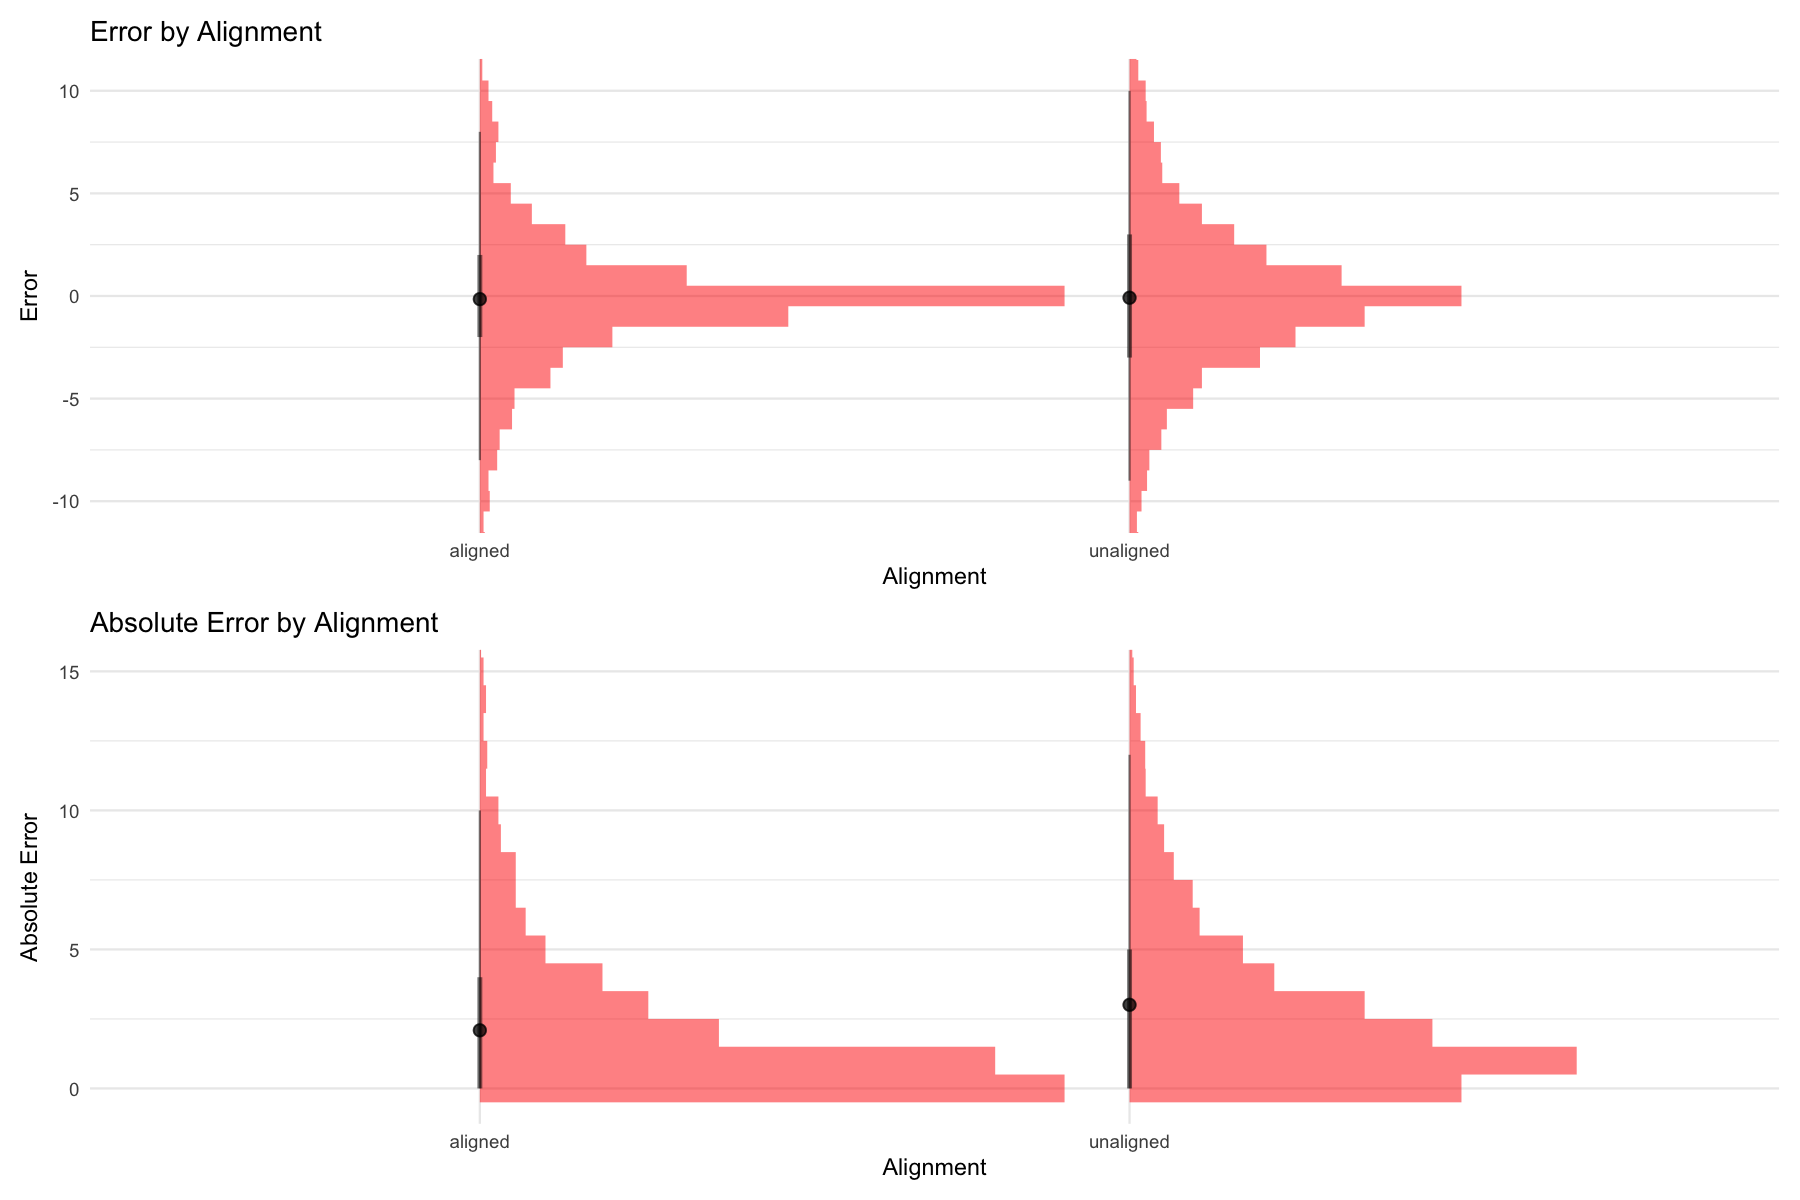

In [510]:
# Error vs. Alignment
breaks_error <- seq(floor(min(data$error)) - 0.5, ceiling(max(data$error)) + 0.5, by = 1)
lims_error <- c(-10.5, 10.5)

p1 <- ggplot(data, aes(x = factor(alignment), y = error)) +
  stat_histinterval(breaks=breaks_error, 
                    alpha=0.5, 
                    fill="red", 
                    point_size=3, 
                    slab_linewidth=3, 
                    point_interval=mean_qi) +
  theme_minimal(base_size = 14) +
  coord_cartesian(ylim = lims_error) +
  labs(
    x = "Alignment",
    y = "Error",
    title = "Error by Alignment"
  )

# Absolute Error vs. Distance to Anchor
breaks_absdiff <- seq(floor(min(data$absError)) - 0.5, ceiling(max(data$absError)) + 0.5, by = 1)
lims_absdiff <- c(-0.5, 15)

p2 <- ggplot(data, aes(x = factor(alignment), y = absError)) +
  stat_histinterval(breaks=breaks_error, 
                    alpha=0.5, 
                    fill="red", 
                    point_size=3, 
                    slab_linewidth=3, 
                    point_interval=mean_qi) +  theme_minimal(base_size = 14) +
  coord_cartesian(ylim = lims_absdiff) +
  labs(
    x = "Alignment",
    y = "Absolute Error",
    title = "Absolute Error by Alignment"
  )

p1 / p2

In [511]:
options(repr.plot.width = 16, repr.plot.height = 6)

binaryAl <- ggplot(data, aes(x = factor(alignment), y = absError, fill = chartType, color = chartType, group = chartType)) +
  stat_histinterval(
    breaks = breaks_absdiff, 
    slab_alpha = 0.3,
    interval_alpha = 0.8,
    linewidth=10,
    point_size = 3, 
    point_alpha = 1,
    point_interval = mean_qi
  ) +
  geom_line(
    stat = "summary",
    fun = mean,
    size = 1.2
  ) +
  theme_minimal(base_size = 14) +
  coord_cartesian(ylim = lims_absdiff) +
  labs(
    x = "Alignment",
    y = "Absolute Error",
  )

categoryAl <- ggplot(data, aes(x = factor(alignmentCategory), y = absError, fill = chartType, color = chartType, group = chartType)) +
  stat_histinterval(
    breaks = breaks_absdiff, 
    slab_alpha = 0.3,
    interval_alpha = 0.8,
    linewidth=10,
    point_size = 3, 
    point_alpha = 1,
    point_interval = mean_qi
  ) +
  geom_line(
    stat = "summary",
    fun = mean,
    size = 1.2
  ) +
  theme_minimal(base_size = 14) +
  coord_cartesian(ylim = lims_absdiff) +
  labs(
    x = "Alignment Category",
    y = "Absolute Error",
  )

distanceAl <- ggplot(data, aes(x = factor(alignmentDistance), y = absError, fill = chartType, color = chartType, group = chartType)) +
  stat_histinterval(
    breaks = breaks_absdiff, 
    slab_alpha = 0.3,
    interval_alpha = 0.8,
    linewidth=10,
    point_size = 3, 
    point_alpha = 1,
    point_interval = mean_qi
  ) +
  geom_line(
    stat = "summary",
    fun = mean,
    size = 1.2
  ) +
  theme_minimal(base_size = 14) +
  coord_cartesian(ylim = lims_absdiff) +
  labs(
    x = "Alignment Distance",
    y = "Absolute Error",
  )

In [512]:
options(repr.plot.width = 16, repr.plot.height = 6)

binaryAn <- ggplot(data, aes(x = factor(anchor), y = absError, fill = chartType, color = chartType, group = chartType)) +
  stat_histinterval(
    breaks = breaks_absdiff, 
    slab_alpha = 0.3,
    interval_alpha = 0.8,
    linewidth=10,
    point_size = 3, 
    point_alpha = 1,
    point_interval = mean_qi
  ) +
  geom_line(
    stat = "summary",
    fun = mean,
    size = 1.2
  ) +
  theme_minimal(base_size = 14) +
  coord_cartesian(ylim = lims_absdiff) +
  labs(
    x = "Anchor",
    y = "Absolute Error",
  )

categoryAn <- ggplot(data, aes(x = factor(anchorCategory), y = absError, fill = chartType, color = chartType, group = chartType)) +
  stat_histinterval(
    breaks = breaks_absdiff, 
    slab_alpha = 0.3,
    interval_alpha = 0.8,
    linewidth=10,
    point_size = 3, 
    point_alpha = 1,
    point_interval = mean_qi
  ) +
  geom_line(
    stat = "summary",
    fun = mean,
    size = 1.2
  ) +
  theme_minimal(base_size = 14) +
  coord_cartesian(ylim = lims_absdiff) +
  labs(
    x = "Anchor Category",
    y = "Absolute Error",
  )

distanceAn <- ggplot(data, aes(x = factor(anchorDistance), y = absError, fill = chartType, color = chartType, group = chartType)) +
  stat_histinterval(
    breaks = breaks_absdiff, 
    slab_alpha = 0.3,
    interval_alpha = 0.8,
    linewidth=10,
    point_size = 3, 
    point_alpha = 1,
    point_interval = mean_qi
  ) +
  geom_line(
    stat = "summary",
    fun = mean,
    size = 1.2
  ) +
  theme_minimal(base_size = 14) +
  coord_cartesian(ylim = lims_absdiff) +
  labs(
    x = "Anchor Distance",
    y = "Absolute Error",
  )

In [513]:
pdf("absoluteErrorEffects.pdf", width = 18, height = 8)
(binaryAl + categoryAl + distanceAl + plot_layout(widths = widths)) / (binaryAn + categoryAn + distanceAn + plot_layout(widths = widths)) +
  plot_layout(guides = "collect", axis_titles = "collect", axes = "collect")
  dev.off()

pdf 
  2

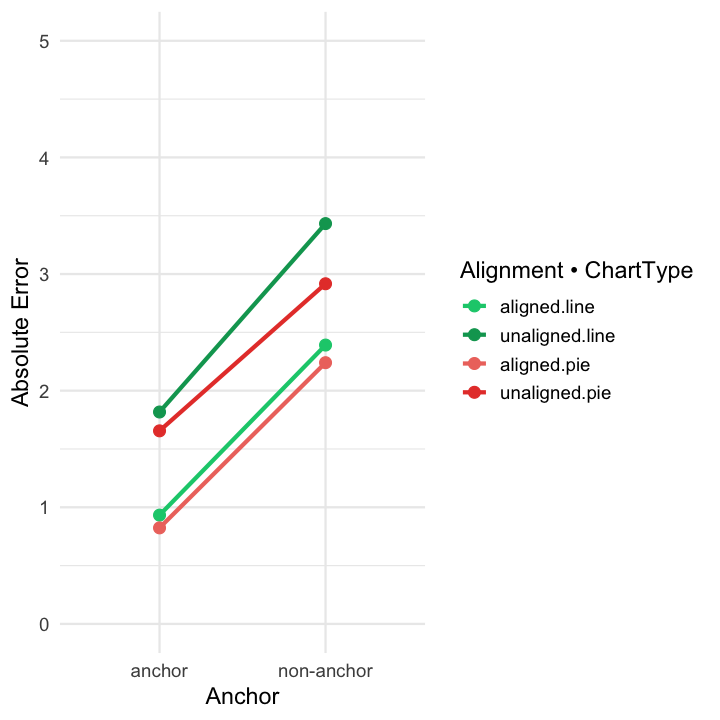

In [514]:
color_vals <- c(
  "aligned.line" = lightgreen,
  "unaligned.line" = green,
  "aligned.pie" = lightred,
  "unaligned.pie" = red
)
data$combo <- interaction(data$alignment, data$chartType, sep = ".")

threeway_lines <- ggplot(
  data,
  aes(
    x = factor(anchor),
    y = absError,
    color = combo,
    group = combo
  )
) +
  stat_summary(
    geom = "line",
    fun = mean,
    size = 1.2
  ) +
  stat_summary(
    geom = "point",
    fun = mean,
    size = 3
  ) +
  scale_color_manual(values = color_vals) +
  theme_minimal(base_size = 14) +
  coord_cartesian(ylim = c(0, 5)) +
  labs(
    x = "Anchor",
    y = "Absolute Error",
    color = "Alignment • ChartType"
  )

options(repr.plot.width = 6, repr.plot.height = 6)
threeway_lines

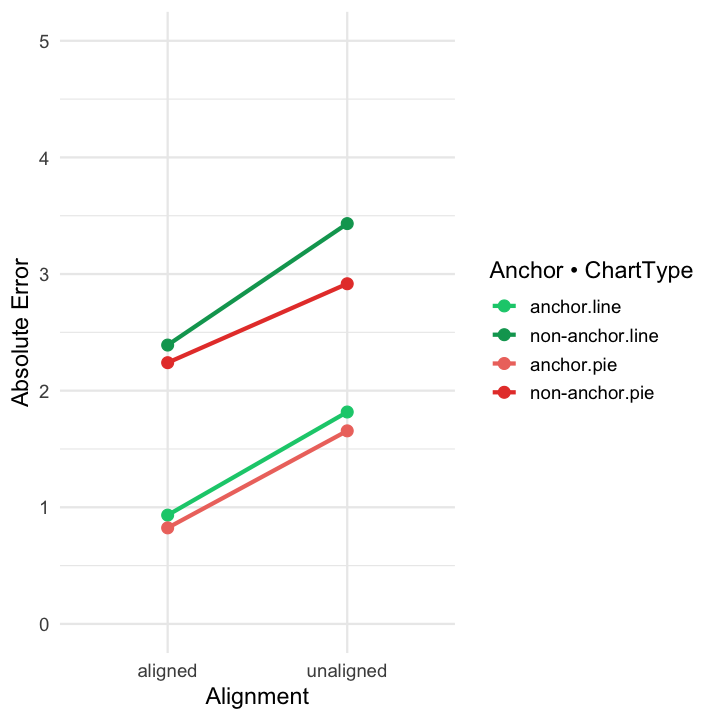

In [515]:
color_vals <- c(
  "anchor.line" = lightgreen,
  "non-anchor.line" = green,
  "anchor.pie" = lightred,
  "non-anchor.pie" = red
)
data$combo <- interaction(data$anchor, data$chartType, sep = ".")

threeway_lines <- ggplot(
  data,
  aes(
    x = factor(alignment),
    y = absError,
    color = combo,
    group = combo
  )
) +
  stat_summary(
    geom = "line",
    fun = mean,
    size = 1.2
  ) +
  stat_summary(
    geom = "point",
    fun = mean,
    size = 3
  ) +
  scale_color_manual(values = color_vals) +
  theme_minimal(base_size = 14) +
  coord_cartesian(ylim = c(0, 5)) +
  labs(
    x = "Alignment",
    y = "Absolute Error",
    color = "Anchor • ChartType"
  )

options(repr.plot.width = 6, repr.plot.height = 6)
threeway_lines

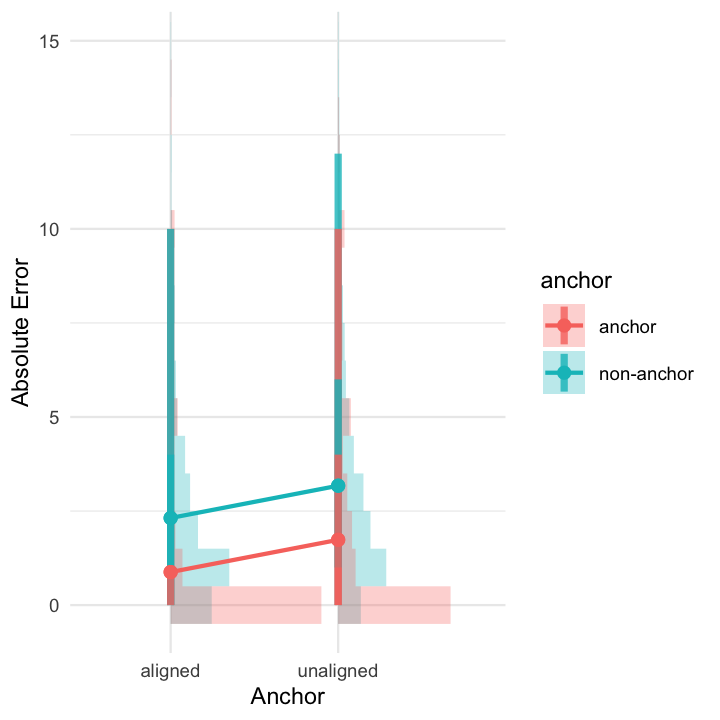

In [516]:
binaryAn <- ggplot(data, aes(x = factor(alignment), y = absError, fill = anchor, color = anchor, group = anchor)) +
  stat_histinterval(
    breaks = breaks_absdiff, 
    slab_alpha = 0.3,
    interval_alpha = 0.8,
    linewidth=10,
    point_size = 3, 
    point_alpha = 1,
    point_interval = mean_qi
  ) +
  geom_line(
    stat = "summary",
    fun = mean,
    size = 1.2
  ) +
  theme_minimal(base_size = 14) +
  coord_cartesian(ylim = lims_absdiff) +
  labs(
    x = "Anchor",
    y = "Absolute Error",
  )

  binaryAn

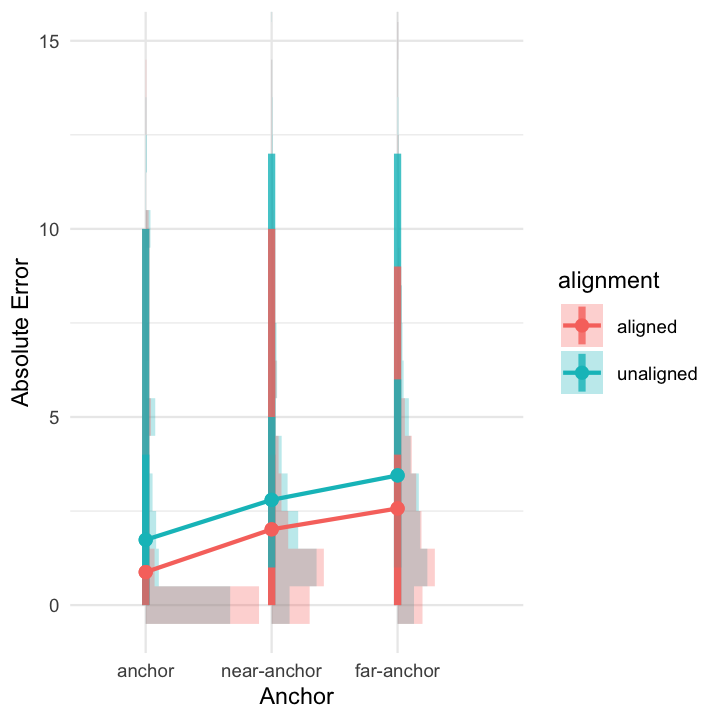

In [517]:
categoryAn <- ggplot(data, aes(x = factor(anchorCategory), y = absError, fill = alignment, color = alignment, group = alignment)) +
  stat_histinterval(
    breaks = breaks_absdiff, 
    slab_alpha = 0.3,
    interval_alpha = 0.8,
    linewidth=10,
    point_size = 3, 
    point_alpha = 1,
    point_interval = mean_qi
  ) +
  geom_line(
    stat = "summary",
    fun = mean,
    size = 1.2
  ) +
  theme_minimal(base_size = 14) +
  coord_cartesian(ylim = lims_absdiff) +
  labs(
    x = "Anchor",
    y = "Absolute Error",
  )

  categoryAn

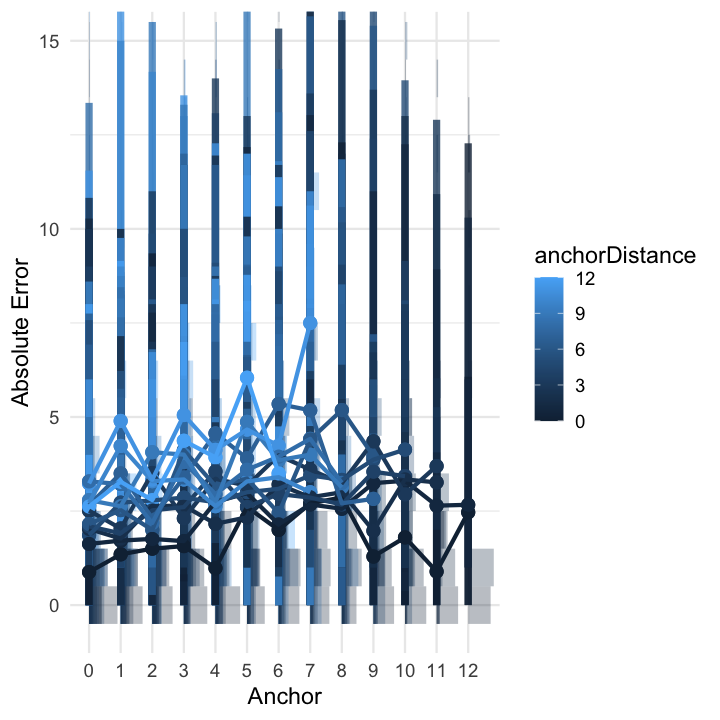

In [518]:
distanceAn <- ggplot(data, aes(x = factor(alignmentDistance), y = absError, fill = anchorDistance, color = anchorDistance, group = anchorDistance)) +
  stat_histinterval(
    breaks = breaks_absdiff, 
    slab_alpha = 0.3,
    interval_alpha = 0.8,
    linewidth=10,
    point_size = 3, 
    point_alpha = 1,
    point_interval = mean_qi
  ) +
  geom_line(
    stat = "summary",
    fun = mean,
    size = 1.2
  ) +
  theme_minimal(base_size = 14) +
  coord_cartesian(ylim = lims_absdiff) +
  labs(
    x = "Anchor",
    y = "Absolute Error",
  )

distanceAn

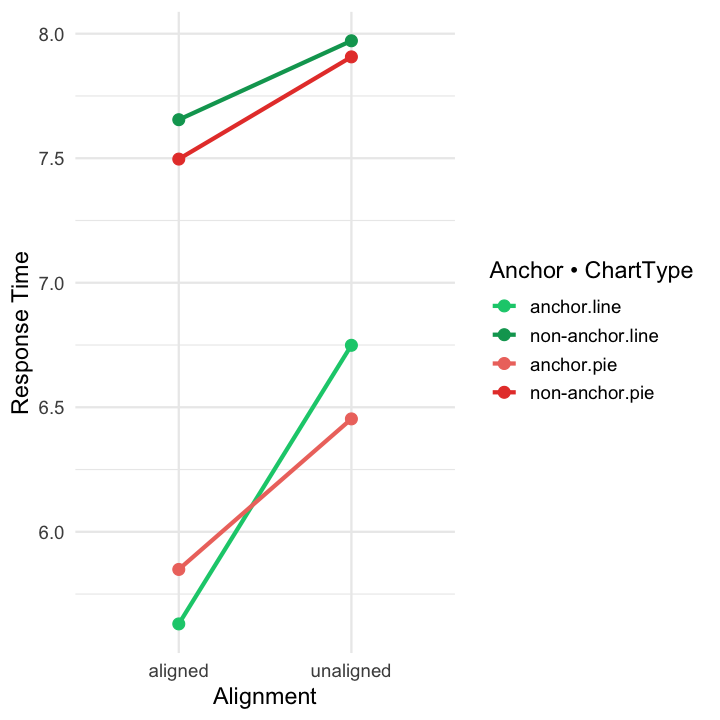

In [519]:
color_vals <- c(
  "anchor.line" = lightgreen,
  "non-anchor.line" = green,
  "anchor.pie" = lightred,
  "non-anchor.pie" = red
)
data$combo <- interaction(data$anchor, data$chartType, sep = ".")

threeway_lines <- ggplot(
  data,
  aes(
    x = factor(alignment),
    y = responseTime,
    color = combo,
    group = combo
  )
) +
  stat_summary(
    geom = "line",
    fun = mean,
    size = 1.2
  ) +
  stat_summary(
    geom = "point",
    fun = mean,
    size = 3
  ) +
  scale_color_manual(values = color_vals) +
  theme_minimal(base_size = 14) +
  # coord_cartesian(ylim = c(0, 5)) +
  labs(
    x = "Alignment",
    y = "Response Time",
    color = "Anchor • ChartType"
  )

options(repr.plot.width = 6, repr.plot.height = 6)
threeway_lines

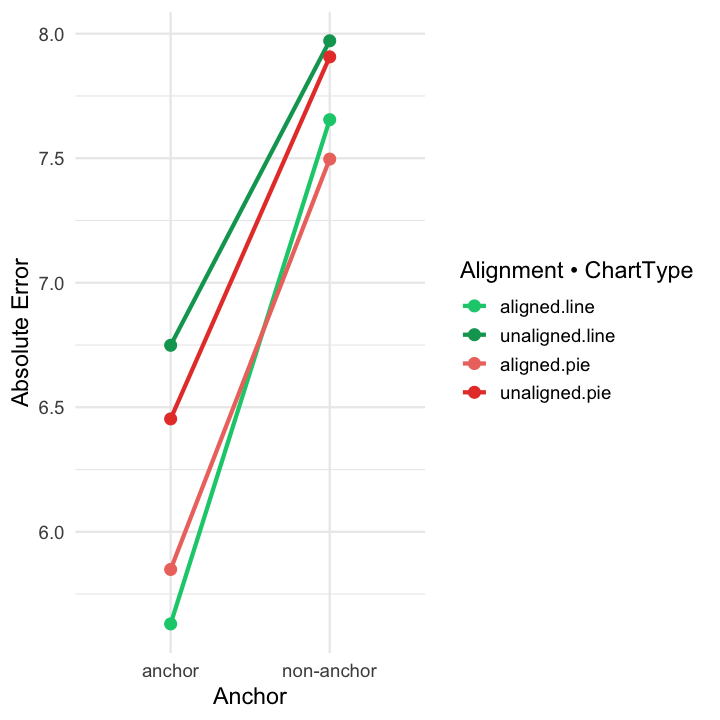

In [520]:
color_vals <- c(
  "aligned.line" = lightgreen,
  "unaligned.line" = green,
  "aligned.pie" = lightred,
  "unaligned.pie" = red
)
data$combo <- interaction(data$alignment, data$chartType, sep = ".")

threeway_lines <- ggplot(
  data,
  aes(
    x = factor(anchor),
    y = responseTime,
    color = combo,
    group = combo
  )
) +
  stat_summary(
    geom = "line",
    fun = mean,
    size = 1.2
  ) +
  stat_summary(
    geom = "point",
    fun = mean,
    size = 3
  ) +
  scale_color_manual(values = color_vals) +
  theme_minimal(base_size = 14) +
#   coord_cartesian(ylim = c(0, 5)) +
  labs(
    x = "Anchor",
    y = "Absolute Error",
    color = "Alignment • ChartType"
  )

options(repr.plot.width = 6, repr.plot.height = 6)
threeway_lines

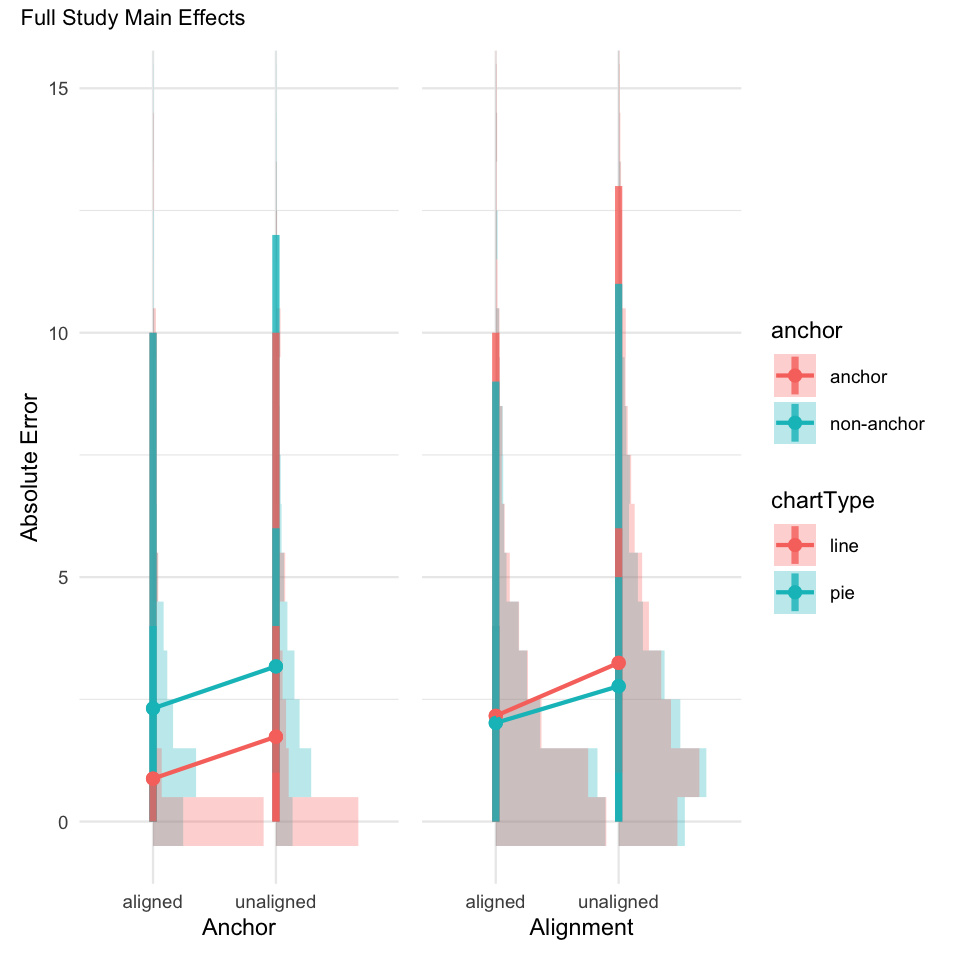

In [521]:
options(repr.plot.width = 8, repr.plot.height = 8)

binaryAn + binaryAl + plot_annotation(title = "Full Study Main Effects") + plot_layout(guides = "collect", axes = "collect")

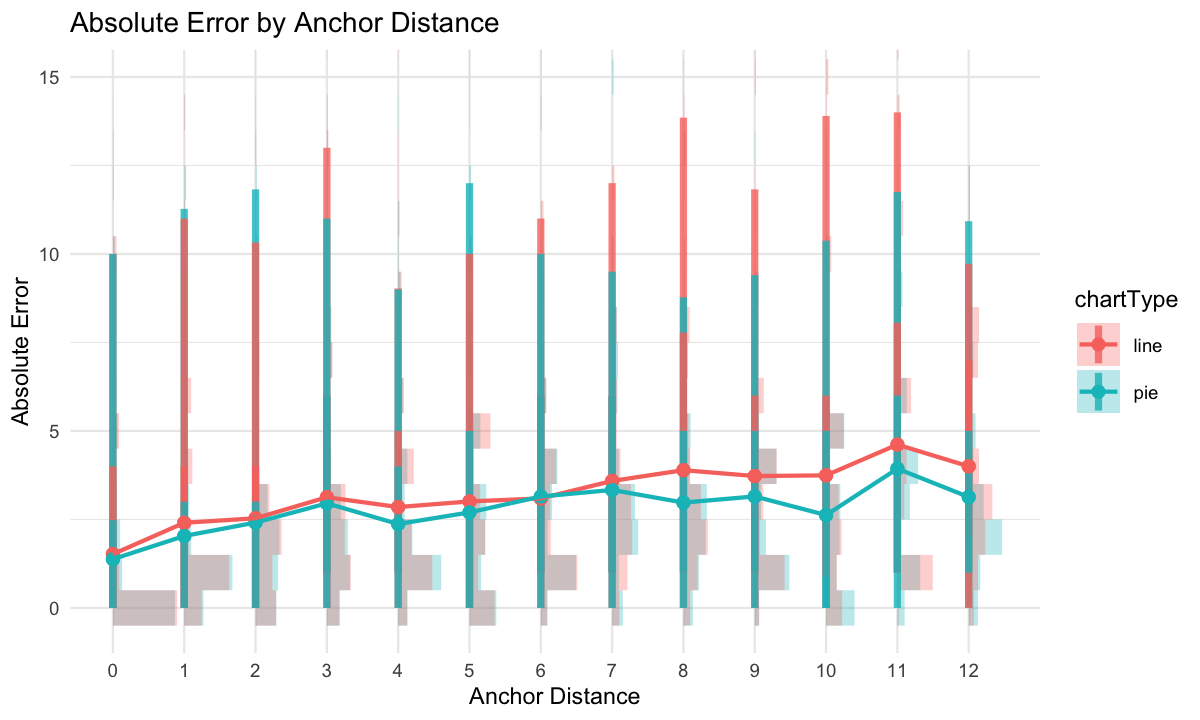

In [522]:
options(repr.plot.width = 10, repr.plot.height = 6)

plot <- ggplot(data, aes(x = factor(anchorDistance), y = absError, fill = chartType, color = chartType, group = chartType)) +
  stat_histinterval(
    breaks = breaks_absdiff, 
    slab_alpha = 0.3,
    interval_alpha = 0.8,
    linewidth=10,
    point_size = 3, 
    point_alpha = 1,
    point_interval = mean_qi
  ) +
  geom_line(
    stat = "summary",
    fun = mean,
    size = 1.2
  ) +
  theme_minimal(base_size = 14) +
  coord_cartesian(ylim = lims_absdiff) +
  labs(
    x = "Anchor Distance",
    y = "Absolute Error",
    title = "Absolute Error by Anchor Distance"
  )

plot

`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?


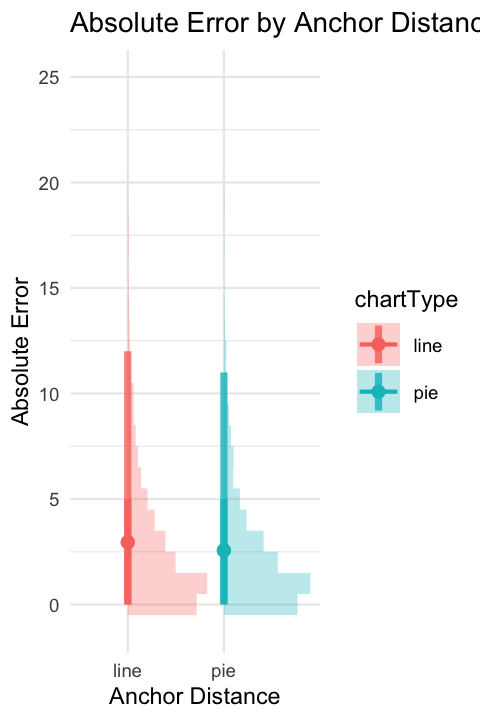

In [523]:
options(repr.plot.width = 4, repr.plot.height = 6)

plot <- ggplot(data, aes(x = factor(chartType), y = absError, fill = chartType, color = chartType, group = chartType)) +
  stat_histinterval(
    breaks = breaks_absdiff, 
    slab_alpha = 0.3,
    interval_alpha = 0.8,
    linewidth=10,
    point_size = 3, 
    point_alpha = 1,
    point_interval = mean_qi
  ) +
  geom_line(
    stat = "summary",
    fun = mean,
    size = 1.2
  ) +
  theme_minimal(base_size = 14) +
  coord_cartesian(ylim = c(-1, 25)) +
  labs(
    x = "Anchor Distance",
    y = "Absolute Error",
    title = "Absolute Error by Anchor Distance"
  )

plot

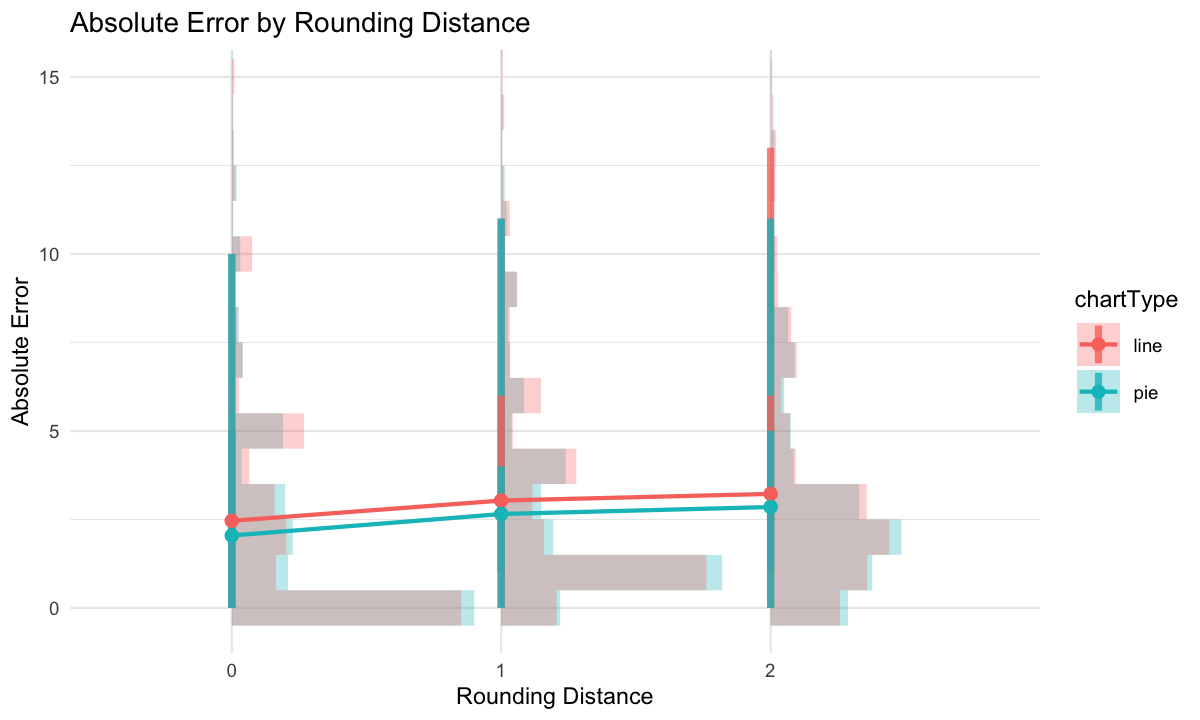

In [524]:
options(repr.plot.width = 10, repr.plot.height = 6)

plot <- ggplot(data, aes(x = factor(distToNearest5), y = absError, fill = chartType, color = chartType, group = chartType)) +
  stat_histinterval(
    breaks = breaks_absdiff, 
    slab_alpha = 0.3,
    interval_alpha = 0.8,
    linewidth=10,
    point_size = 3, 
    point_alpha = 1,
    point_interval = mean_qi
  ) +
  geom_line(
    stat = "summary",
    fun = mean,
    size = 1.2
  ) +
  theme_minimal(base_size = 14) +
  coord_cartesian(ylim = lims_absdiff) +
  labs(
    x = "Rounding Distance",
    y = "Absolute Error",
    title = "Absolute Error by Rounding Distance"
  )

plot

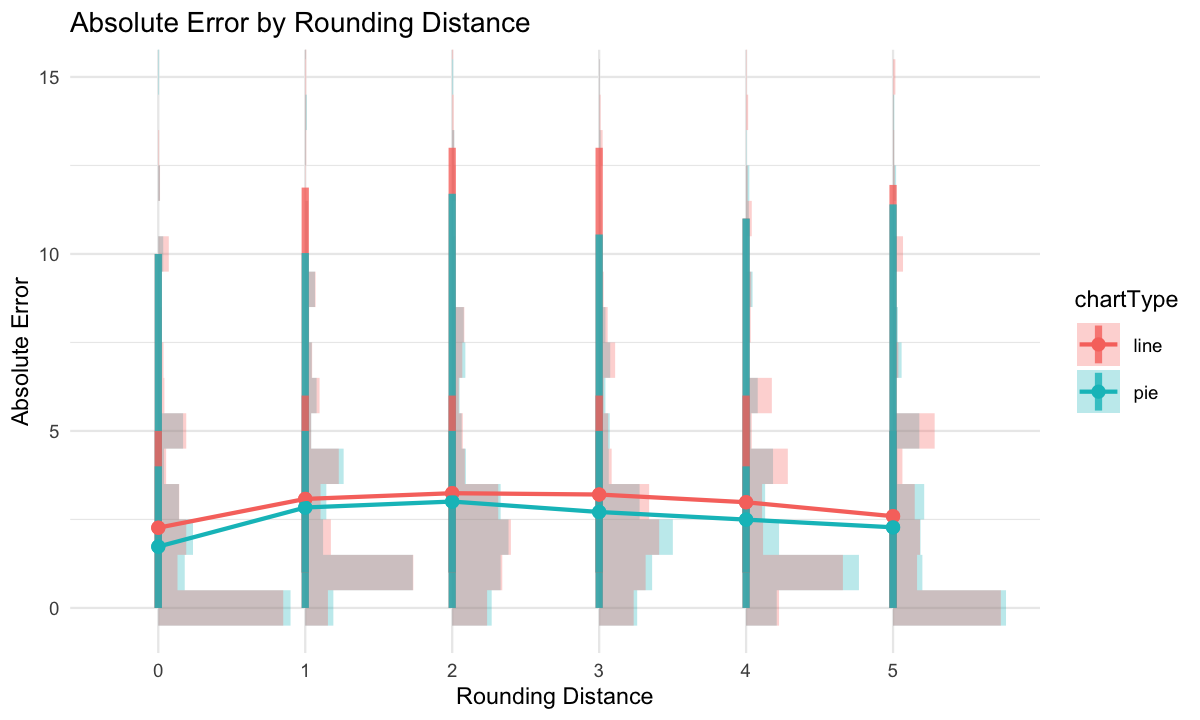

In [525]:
options(repr.plot.width = 10, repr.plot.height = 6)

plot <- ggplot(data, aes(x = factor(distToNearest10), y = absError, fill = chartType, color = chartType, group = chartType)) +
  stat_histinterval(
    breaks = breaks_absdiff, 
    slab_alpha = 0.3,
    interval_alpha = 0.8,
    linewidth=10,
    point_size = 3, 
    point_alpha = 1,
    point_interval = mean_qi
  ) +
  geom_line(
    stat = "summary",
    fun = mean,
    size = 1.2
  ) +
  theme_minimal(base_size = 14) +
  coord_cartesian(ylim = lims_absdiff) +
  labs(
    x = "Rounding Distance",
    y = "Absolute Error",
    title = "Absolute Error by Rounding Distance"
  )

plot

In [526]:
binaryAnRT <- ggplot(data, aes(x = factor(anchor), y = responseTime, fill = chartType, color = chartType, group = chartType)) +
  stat_halfeye(
    breaks = breaks_absdiff, 
    slab_alpha = 0.3,
    interval_alpha = 0.8,
    linewidth=10,
    point_size = 3, 
    point_alpha = 1,
    point_interval = mean_qi
  ) +
  geom_line(
    stat = "summary",
    fun = mean,
    size = 1.2
  ) +
  theme_minimal(base_size = 14) +
  coord_cartesian(ylim = c(0, 20)) +
  labs(
    x = "Anchor",
    y = "Response Time (s)",
  )

categoryAnRT <- ggplot(data, aes(x = factor(anchorCategory), y = responseTime, fill = chartType, color = chartType, group = chartType)) +
  stat_halfeye(
    breaks = breaks_absdiff, 
    slab_alpha = 0.3,
    interval_alpha = 0.8,
    linewidth=10,
    point_size = 3, 
    point_alpha = 1,
    point_interval = mean_qi
  ) +
  geom_line(
    stat = "summary",
    fun = mean,
    size = 1.2
  ) +
  theme_minimal(base_size = 14) +
  coord_cartesian(ylim = c(0, 20)) +
  labs(
    x = "Anchor Category",
    y = "Response Time (s)",
  )

distanceAnRT <- ggplot(data, aes(x = factor(anchorDistance), y = responseTime, fill = chartType, color = chartType, group = chartType)) +
  stat_halfeye(
    breaks = breaks_absdiff, 
    slab_alpha = 0.3,
    interval_alpha = 0.8,
    linewidth=10,
    point_size = 3, 
    point_alpha = 1,
    point_interval = mean_qi
  ) +
  geom_line(
    stat = "summary",
    fun = mean,
    size = 1.2
  ) +
  theme_minimal(base_size = 14) +
  coord_cartesian(ylim = c(0, 20)) +
  labs(
    x = "Anchor Distance",
    y = "Response Time (s)",
  )

In [527]:
binaryAlRT <- ggplot(data, aes(x = factor(alignment), y = responseTime, fill = chartType, color = chartType, group = chartType)) +
  stat_halfeye(
    breaks = breaks_absdiff, 
    slab_alpha = 0.3,
    interval_alpha = 0.8,
    linewidth=10,
    point_size = 3, 
    point_alpha = 1,
    point_interval = mean_qi
  ) +
  geom_line(
    stat = "summary",
    fun = mean,
    size = 1.2
  ) +
  theme_minimal(base_size = 14) +
  coord_cartesian(ylim = c(0, 20)) +
  labs(
    x = "Alignment",
    y = "Response Time (s)",
  )

categoryAlRT <- ggplot(data, aes(x = factor(alignmentCategory), y = responseTime, fill = chartType, color = chartType, group = chartType)) +
  stat_halfeye(
    breaks = breaks_absdiff, 
    slab_alpha = 0.3,
    interval_alpha = 0.8,
    linewidth=10,
    point_size = 3, 
    point_alpha = 1,
    point_interval = mean_qi
  ) +
  geom_line(
    stat = "summary",
    fun = mean,
    size = 1.2
  ) +
  theme_minimal(base_size = 14) +
  coord_cartesian(ylim = c(0, 20)) +
  labs(
    x = "Alignment Category",
    y = "Response Time (s)",
  )

distanceAlRT <- ggplot(data, aes(x = factor(alignmentDistance), y = responseTime, fill = chartType, color = chartType, group = chartType)) +
  stat_halfeye(
    breaks = breaks_absdiff, 
    slab_alpha = 0,
    interval_alpha = 0.8,
    linewidth=10,
    point_size = 3, 
    point_alpha = 1,
    point_interval = mean_qi
  ) +
  geom_line(
    stat = "summary",
    fun = mean,
    size = 1.2
  ) +
  theme_minimal(base_size = 14) +
  coord_cartesian(ylim = c(0, 20)) +
  labs(
    x = "Alignment Distance",
    y = "Response Time (s)",
  )

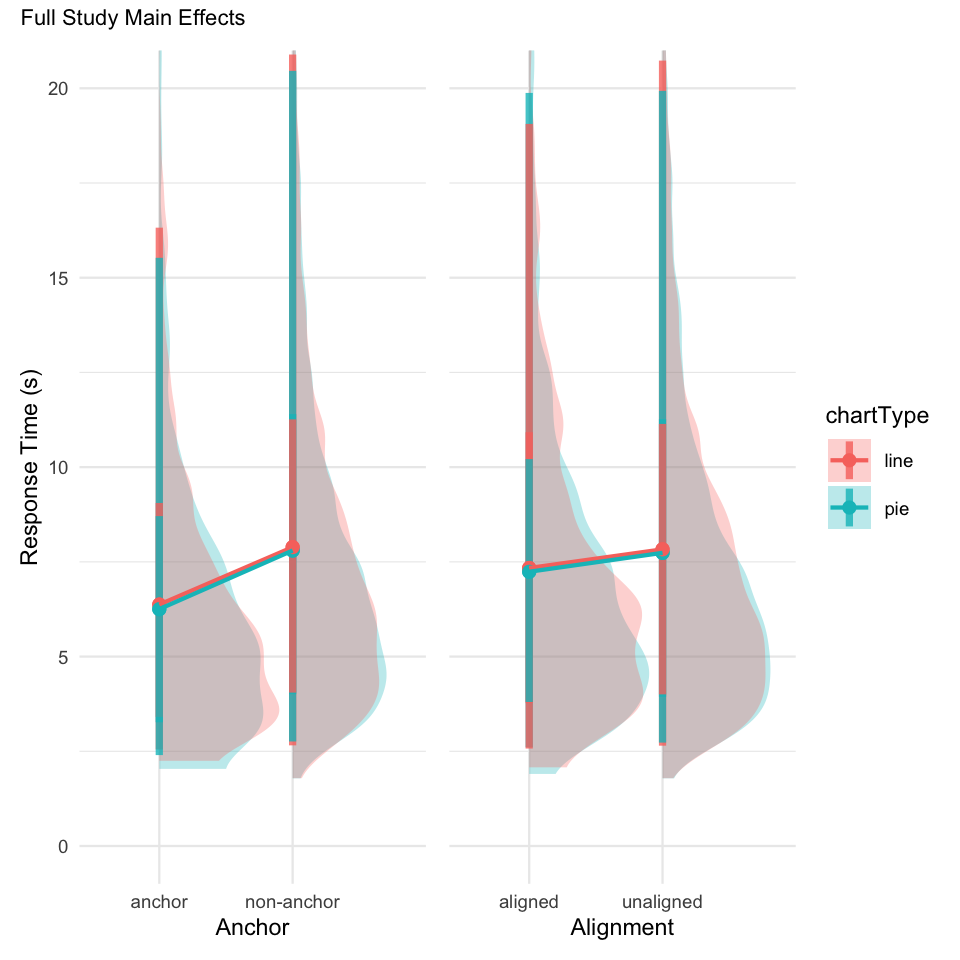

In [528]:
options(repr.plot.width = 8, repr.plot.height = 8)

binaryAnRT + binaryAlRT + plot_annotation(title = "Full Study Main Effects") + plot_layout(guides = "collect", axes = "collect")

In [529]:
dodge_width <- 0.2

binaryAlRT <- ggplot(data, aes(x = factor(alignment), y = responseTime, fill = chartType, color = chartType, group = chartType)) +
  stat_halfeye(
    breaks = breaks_absdiff, 
    slab_alpha = 0.3,
    interval_alpha = 0.8,
    linewidth = 10,
    point_size = 3, 
    point_alpha = 1,
    point_interval = mean_qi,
    aes(x = as.numeric(factor(alignment)) + 
            ifelse(chartType == "line", -dodge_width, dodge_width))
  ) +
  geom_line(
    stat = "summary",
    fun = mean,
    size = 1.2
    # no dodge here
  ) +
  scale_x_continuous(
    breaks = c(1, 2),
    labels = c("aligned", "unaligned")
  ) +
  theme_minimal(base_size = 14) +
  coord_cartesian(ylim = c(0, 20)) +
  labs(
    x = "Alignment",
    y = "Response Time (s)"
  )


In [530]:
options(repr.plot.width = 16, repr.plot.height = 8)
widths <- c(4, 6, 12)

top_row <- binaryAlRT + categoryAlRT + distanceAlRT + 
  plot_layout(widths = widths)

bottom_row <- binaryAnRT + categoryAnRT + distanceAnRT + 
  plot_layout(widths = widths)

combined_plot <- top_row / bottom_row +
  plot_layout(guides = "collect", axis_titles = "collect", axes = "collect") &
  plot_annotation(title = "Response Time Effects")

combined_plot

ERROR while rich displaying an object: Error in `scale_x_continuous()`:
! Discrete values supplied to continuous scale.
ℹ Example values: unaligned, aligned, aligned, unaligned, and unaligned

Traceback:
1. sapply(x, f, simplify = simplify)
2. lapply(X = X, FUN = FUN, ...)
3. FUN(X[[i]], ...)
4. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
5. tryCatchList(expr, classes, parentenv, handlers)
6. tryCatchOne(expr, names, parentenv, handlers[[1L]])
7. doTryCatch(return(expr), name, parentenv, handler)
8. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null

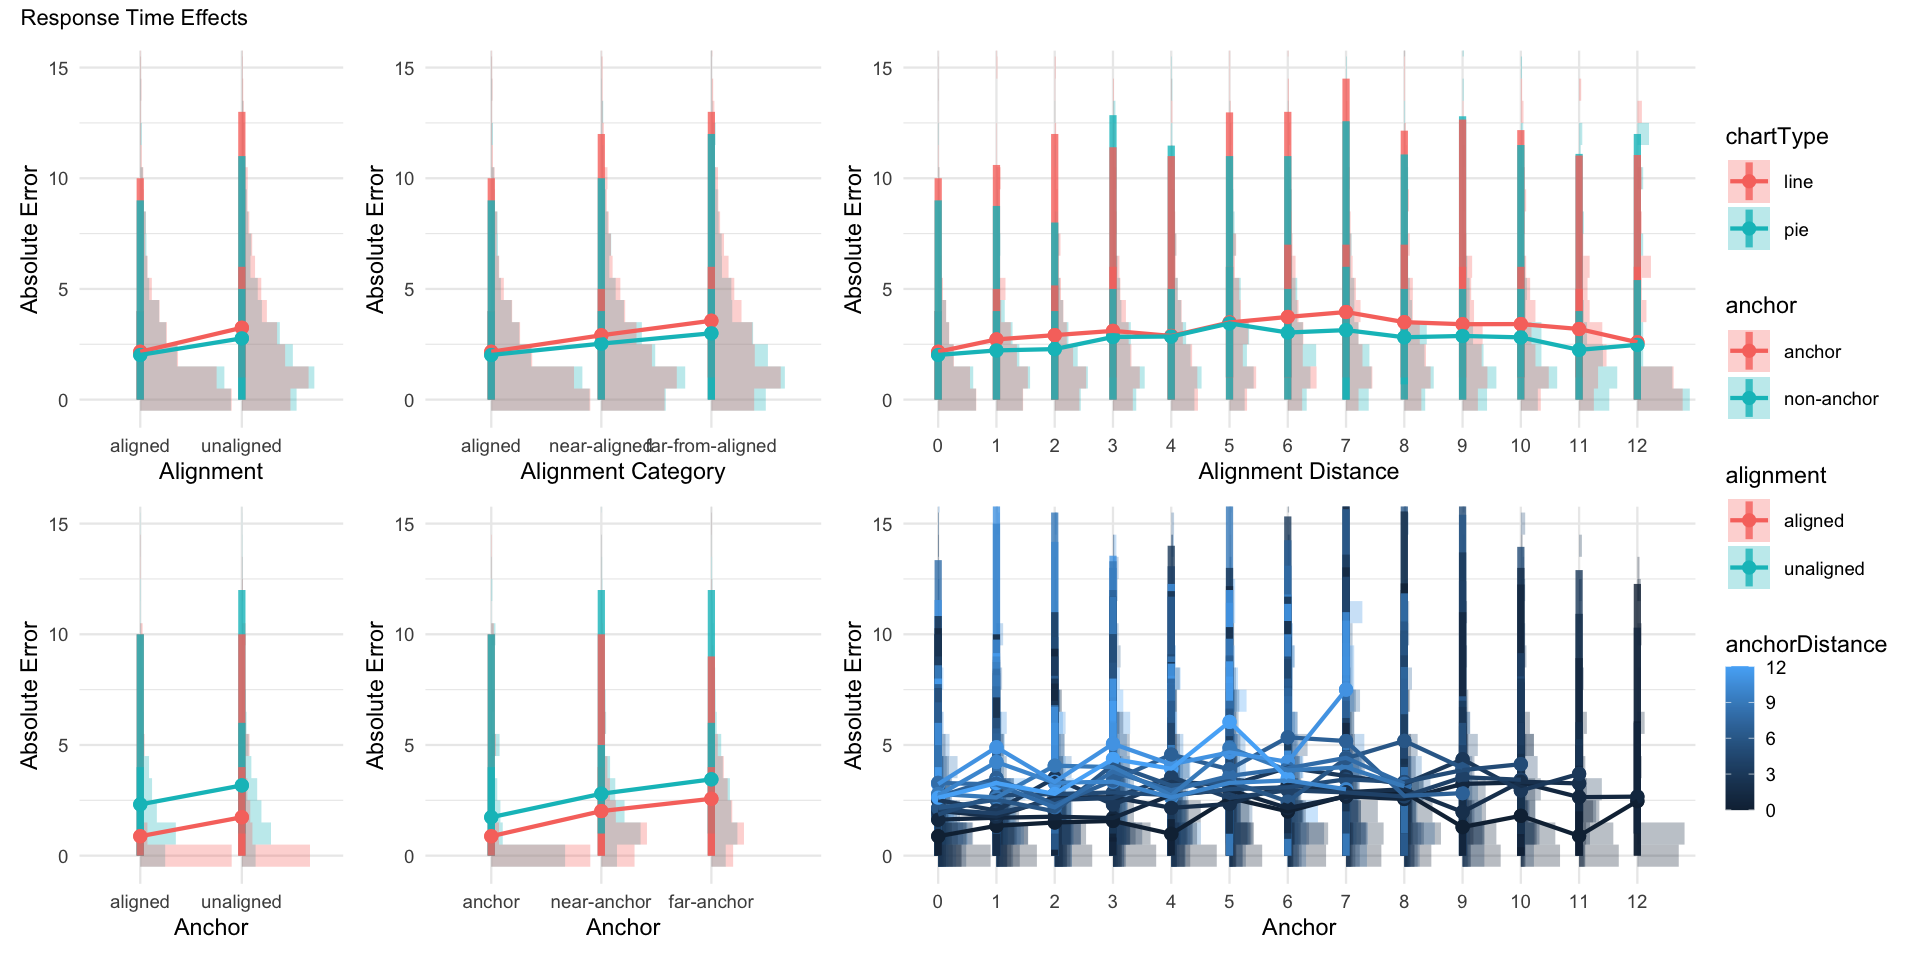

In [531]:
options(repr.plot.width = 16, repr.plot.height = 8)
widths <- c(4, 6, 12)

top_row <- binaryAl + categoryAl + distanceAl + 
  plot_layout(widths = widths)

bottom_row <- binaryAn + categoryAn + distanceAn + 
  plot_layout(widths = widths)

combined_plot <- top_row / bottom_row +
  plot_layout(guides = "collect", axis_titles = "collect", axes = "collect") &
  plot_annotation(title = "Response Time Effects")

combined_plot